In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential
from keras.layers import Layer, Flatten, Dense,Dropout, Input, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.utils import plot_model

In [ ]:
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pos_df = pd.read_csv("/content/drive/MyDrive/zanam/pos_him_iit.csv")
# pos_df = pd.read_csv("csv/pos_aug.csv")

In [ ]:
neg_df = pd.read_csv("/content/drive/MyDrive/zanam/neg_him_iit.csv")
# neg_df = pd.read_csv("csv/neg_aug.csv")

In [ ]:
len(pos_df), len(neg_df)

(6058, 6058)

In [ ]:
pos_df["label"] = 1
neg_df["label"] = 0

In [ ]:
pos_df.head()

,image1,image2,label
0,iit_001_01_L.bmp,iit_001_02_L.bmp,1
1,iit_001_01_L.bmp,iit_001_03_L.bmp,1
2,iit_001_01_L.bmp,iit_001_04_L.bmp,1
3,iit_001_01_L.bmp,iit_001_05_L.bmp,1
4,iit_001_01_L.bmp,iit_001_06_L.bmp,1


In [ ]:
pos_df.shape

(6058, 3)

In [ ]:
neg_df

,image1,image2,label
0,iit_131_04_L.bmp,iit_044_02_L.bmp,0
1,iit_144_09_R.bmp,iit_044_01_L.bmp,0
2,iit_177_09_R.bmp,iit_014_05_L.bmp,0
3,iit_198_09_R.bmp,iit_044_04_L.bmp,0
4,iit_028_07_R.bmp,iit_124_06_R.bmp,0
...,...,...,...
6053,iit_003_08_L.bmp,iit_073_05_L.bmp,0
6054,iit_170_05_L.bmp,iit_196_09_R.bmp,0
6055,iit_001_10_L.bmp,iit_209_07_R.bmp,0
6056,iit_077_04_L.bmp,iit_047_03_L.bmp,0


In [ ]:
# neg_df = neg_df.sample(n=5000).reset_index(drop=True)
# pos_df = pos_df.sample(n=5000).reset_index(drop=True)

In [ ]:
df = pd.concat([pos_df, neg_df])

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,image1,image2,label
0,075_2_aug1.bmp,075_5_aug1.bmp,1
1,063_5_aug1.bmp,063_5_aug2.bmp,1
2,079_4_aug2.bmp,079_4_aug3.bmp,1
3,064_5.bmp,086_2.bmp,0
4,208_4_aug1.bmp,208_5.bmp,1
...,...,...,...
9995,053_5_aug3.bmp,053_5.bmp,1
9996,070_3_aug3.bmp,141_3_aug3.bmp,0
9997,188_3_aug3.bmp,188_1_aug2.bmp,1
9998,024_3.bmp,024_3_aug1.bmp,1


In [ ]:
image1=tf.data.Dataset.from_tensor_slices('/content/drive/MyDrive/zanam/himansu_iit/'+df['image1'])
image2=tf.data.Dataset.from_tensor_slices('/content/drive/MyDrive/zanam/himansu_iit/'+df['image2'])
labels=tf.data.Dataset.from_tensor_slices(df['label'])

In [ ]:
# count_zeros = (df_train['label']==0).sum()
# print(count_zeros, len(df_train)-count_zeros)

In [ ]:
%load_ext tensorboard

In [ ]:
import os
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)
import datetime
# def create_tensorboard_callback():
#   logdir = os.path.join("/content/drive/MyDrive/iris_logs",
#                         # Make it so the logs get tracked whenever we run an experiment
#                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  # return tf.keras.callbacks.TensorBoard(logdir)
# TensorBoard = create_tensorboard_callback()
checkpoint_dir = "/content/drive/MyDrive/iris_checkpoints/himansu/ckpt/checkpoint.keras"
# checkpoint_path = os.path.join(checkpoint_dir, "epoch_{epoch:02d}")
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_dir,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    save_freq = 2
)

In [ ]:
def load_and_preprocess_image(image_path):

    image = tf.io.read_file(image_path)
    image = tf.image.decode_bmp(image, channels=0)
    # image=tf.image.grayscale_to_rgb(image)

    image = tf.image.resize(image, size = (224,224))
    # image = tf.cast(image, tf.float32)
    image = image/255.0
    return image

In [ ]:
sample_image = load_and_preprocess_image("/content/drive/MyDrive/zanam/himansu_iit/iit_001_10_L.bmp")

In [ ]:
sample_image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.08018105, 0.08018105, 0.08018105]],

       [[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.08018105, 0.08018105, 0.08018105]],

       [[0.05721164, 0.05721164, 0.05721164],
        [0.03986939, 0.03986939, 0.03986939],
        [0.04066408, 0.04066408, 0.04066408],
        ...,
        [0.04195232, 0.04195232, 0.04195232],
        [0.04198423, 0.04198423, 0.04198423],
        [0.10131051, 0.10131051, 0.10131051]],

       ...,

       [[0.4670822 , 0.4670822 , 0.4670822 ],
        [0.56

In [ ]:
image1_dataset = image1.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
image2_dataset = image2.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)


In [ ]:
batch_size = 32
image1_dataset_features = image1_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
image2_dataset_features = image2_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
labels=labels.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
image1_dataset

<_ParallelMapDataset element_spec=TensorSpec(shape=(224, 224, None), dtype=tf.float32, name=None)>

In [ ]:
len(labels)

0

In [ ]:
len(image1_dataset_features)

378

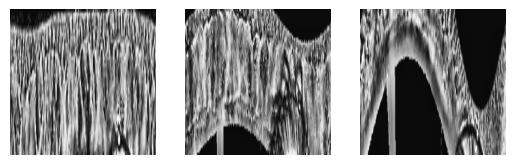

In [ ]:
imgbatch=image1_dataset_features.as_numpy_iterator().next()

for i in range(3):
  plt.subplot(1,3,i+1)
  # plt.imshow(imgbatch[i].astype('uint8'))
  plt.imshow(imgbatch[i])
  plt.axis('off')


In [ ]:
def format_data(image1, image2, labels):
    return (image1, image2), labels
ds = tf.data.Dataset.zip((image1_dataset_features, image2_dataset_features, labels)).map(format_data)

In [ ]:
images,labels=ds.as_numpy_iterator().next()

In [ ]:
image1,image2=images

TypeError: '_TensorSliceDataset' object is not subscriptable

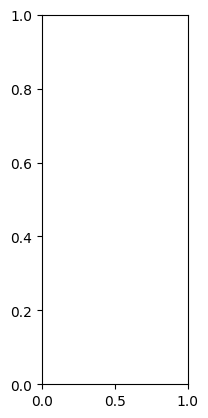

In [ ]:
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(image2[i].astype('uint8'))
  plt.axis('off')

In [ ]:
image1[0].shape

(224, 224, 3)

In [ ]:
total_batches=tf.data.experimental.cardinality(ds)
print(total_batches)

tf.Tensor(379, shape=(), dtype=int64)


In [ ]:
len(ds)

379

In [ ]:
test_ds=ds.take(total_batches//50)
train_ds=ds.skip(total_batches//50)

In [ ]:
# df_train, df_val = train_test_split(combined_df, test_size = 0.2, random_state = 42)

In [ ]:
# def data_generator_tf(df, batch_size = 32, val=False):

#   if not val:
#     df = df.sample(frac=1)

#   image1_path_tensor = tf.data.Dataset.from_tensor_slices(df["image1"])
#   image2_path_tensor = tf.data.Dataset.from_tensor_slices(df["image2"])
#   labels_tensor = tf.data.Dataset.from_tensor_slices(df["label"])

#   # image1_dataset = image1_path_tensor.map(load_and_process_image, num_parallel_calls=tf.data.AUTOTUNE)
#   # image2_dataset = image2_path_tensor.map(load_and_process_image, num_parallel_calls=tf.data.AUTOTUNE)

#   # dataset = tf.data.Dataset.zip((image1_dataset, image2_dataset),labels_tensor)
#   dataset = tf.data.Dataset.zip((image1_path_tensor, image2_path_tensor), labels_tensor)
#   # dataset = tf.data.Dataset.zip((image1_dataset.batch(batch_size), image2_dataset.batch(batch_size), labels_tensor.batch(batch_size)))
#   dataset = dataset.batch(batch_size)#.prefetch(buffer_size = tf.data.AUTOTUNE)


#   return dataset

# train_generator = data_generator_tf(df_train, batch_size=batch_size)
# val_generator = data_generator_tf(df_val, batch_size=batch_size, val=True)




In [ ]:
# train_sample = train_generator.as_numpy_iterator()
# print(train_sample.next())
# print(train_sample.next())
# print(train_sample.next())
# print(train_sample.next())


In [ ]:
train_batches=tf.data.experimental.cardinality(train_ds)
train_batches

<tf.Tensor: shape=(), dtype=int64, numpy=372>

In [ ]:
train_ds = train_ds.shuffle(1000)

In [ ]:
val_ds = train_ds.take(train_batches//4)
train_ds = train_ds.skip(train_batches//4)

In [ ]:
print(len(val_ds))
print(len(train_ds))
print(len(test_ds))

93
186
7


In [ ]:
from keras import layers,models
from keras.applications import VGG16
from sklearn.model_selection import KFold
input_shape=(224,224,3)

In [ ]:
def vgg16_feature_extractor(input_shape):
    # Create VGG16 base model
    base_model = VGG16(include_top=False, input_shape=input_shape,weights='imagenet')

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Get the output of the base model
    output = base_model.output

    # Flatten the output feature vectors
    output = layers.GlobalAveragePooling2D()(output)

    # Create the model
    model = models.Model(inputs=base_model.input, outputs=output)

    return model

In [ ]:

def build_siamese_vgg16(input_shape):
    # Define the input layer for the first image
    input_a = layers.Input(shape=input_shape, name='input_a')
    # Define the input layer for the second image
    input_b = layers.Input(shape=input_shape, name='input_b')

    # data_augmentation = tf.keras.Sequential([
    #   layers.RandomFlip("horizontal_and_vertical"),
    #   layers.RandomRotation(0.2),
    # ], name = "data_augmentation")
    # augmented_input_a = data_augmentation(input_a)
    # augmented_input_b = data_augmentation(input_b)
    # Define the VGG16 model (excluding the top layers)
    base_model = vgg16_feature_extractor(input_shape)


    # Get the output feature vectors from the base model for both inputs
    output_a = base_model(input_a)
    output_b = base_model(input_b)

    output_a = Dropout(0.2)(output_a)
    output_b = Dropout(0.2)(output_b)
    # concatenated_features = layers.Concatenate()([output_a, output_b])

    # Distance calculation
    distance = layers.Lambda(lambda x: K.abs(x[0] - x[1]), name='distance')([output_a, output_b])

    # Output layer
    output = layers.Dense(1, activation='sigmoid', name='output')(distance)

    # Create the Siamese model
    siamese_model = models.Model(inputs=[input_a, input_b], outputs=output, name='siamese_vgg16')

    return siamese_model

# Set the input shape for the VGG16 model
input_shape = (224, 224, 3)

# Build the Siamese VGG16 twins model

siamese_vgg16 = build_siamese_vgg16(input_shape)

# Compile the model with contrastive loss


# Display the model summary
siamese_vgg16.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "siamese_vgg16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_a (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_b (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 model (Functional)          (None, 512)                  1471468   ['input_a[0][0]',             
                                                          8          'input_b[0][0]']             
                                                                                                  
 dropout (Dropout)   

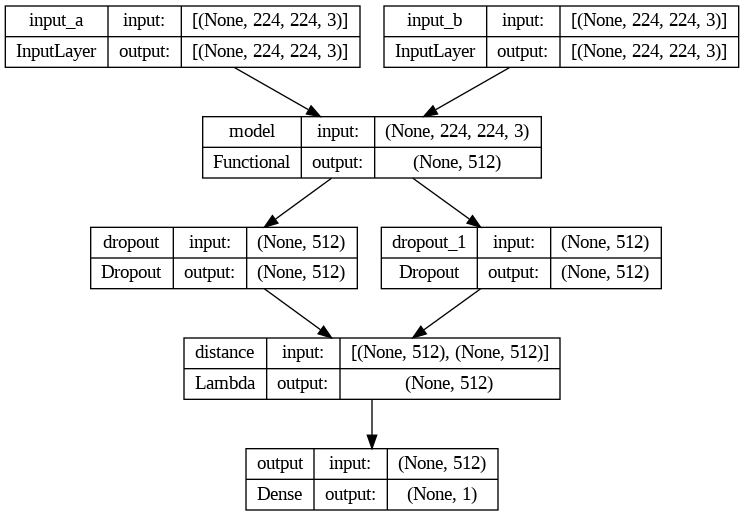

In [ ]:
tf.keras.utils.plot_model(siamese_vgg16,show_shapes=True)

In [ ]:
from keras.losses import binary_crossentropy

# num_epochs = 10
learning_rate = 0.001

# siamese_vgg16.compile(optimizer =tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate),
#                       loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
#                       metrics = ["accuracy"])
# Fit the model using generators
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
def create_and_compile_model():
  siamese_vgg16.compile(optimizer =tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate),
                        loss = tf.keras.losses.BinaryCrossentropy(),
                        metrics = ["accuracy"])
  return siamese_vgg16


In [ ]:
train_ds

<_SkipDataset element_spec=((TensorSpec(shape=(None, 224, 224, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 224, 224, None), dtype=tf.float32, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
siamese_vgg16 = create_and_compile_model()
# tensorboard = create_tensorboard_callback()
history = siamese_vgg16.fit(train_ds, epochs = 10, verbose=1,validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [ ]:
siamese_vgg16.save("himansu_iit.keras")

In [ ]:
from keras.models import load_model

In [ ]:
loaded_model = load_model("himansu_iit.keras", safe_mode=False)

In [ ]:
loaded_model

In [ ]:
import pickle

In [ ]:
model_save_path = "/content/drive/MyDrive/zanam/history2.pkl"
with open(model_save_path, 'wb') as file:
  pickle.dump(history.history, file)

In [ ]:
model_load_path = "/content/drive/MyDrive/zanam/history2.pkl"
with open(model_load_path, 'rb') as file:
  loaded_history = pickle.load(file)

In [ ]:
loaded_history

{'loss': [0.8290607333183289,
  0.5213044881820679,
  0.4661695063114166,
  0.43977802991867065,
  0.422511488199234,
  0.40954333543777466,
  0.3990478813648224,
  0.3901491165161133,
  0.38236671686172485,
  0.3754151165485382],
 'accuracy': [0.6035217642784119,
  0.7599820494651794,
  0.7936294078826904,
  0.8087707757949829,
  0.8185284733772278,
  0.8263795375823975,
  0.8301929235458374,
  0.8349035382270813,
  0.8399506211280823,
  0.8428667783737183],
 'val_loss': [0.5423461198806763,
  0.46290189027786255,
  0.43742886185646057,
  0.423877090215683,
  0.4145340919494629,
  0.40718480944633484,
  0.4009644687175751,
  0.39546358585357666,
  0.39046698808670044,
  0.38585489988327026],
 'val_accuracy': [0.7362231016159058,
  0.7936828136444092,
  0.8074596524238586,
  0.8161962628364563,
  0.8215726017951965,
  0.8242607712745667,
  0.8269489407539368,
  0.8326612710952759,
  0.8326612710952759,
  0.8350134491920471]}

In [ ]:
epochs=10
acc = loaded_history['accuracy']
val_acc = loaded_history['val_accuracy']

loss = loaded_history['loss']
val_loss = loaded_history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('test.png')
plt.show()

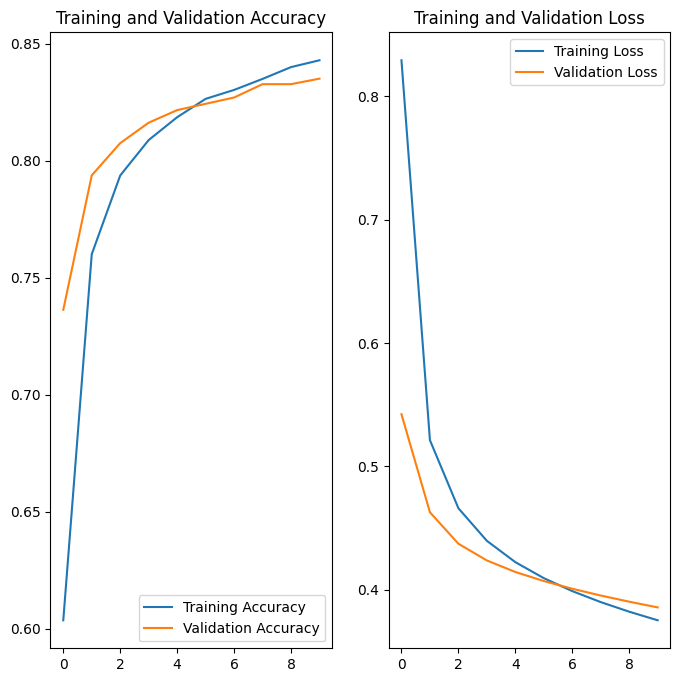

In [ ]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('test.png')
plt.show()

In [ ]:
images,labels=test_ds.as_numpy_iterator().next()
image1,image2=images

In [ ]:
predictions=siamese_vgg16.predict_on_batch(images)

In [ ]:
predictions=tf.where(predictions<0.5,0,1)

In [ ]:

num_inputs = min(len(image1), len(image2), 5)  # Limit to 5 inputs or the length of the shortest list/array

fig, axes = plt.subplots(num_inputs, 3, figsize=(12, 3*num_inputs))  # Adjust the figure size as needed

for i in range(num_inputs):
    # Set title for input


    # Display image 1
    axes[i, 0].imshow(image1[i].astype('uint8'))
    axes[i, 0].set_title('Image 1')

    # Display image 2
    axes[i, 1].imshow(image2[i].astype('uint8'))
    axes[i, 1].set_title('Image 2')

    # Display true label
    axes[i, 2].text(0.5, 0.5, f'True Label: {labels[i]}\nPredicted Label: {predictions[i]}',
                    horizontalalignment='center', verticalalignment='center')
    axes[i, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Save the plot as PNG
plt.savefig('plot.png')
plt.show()


In [ ]:

# model = create_and_compile_model()
# model.load_weights()

## Cross validation

In [ ]:
# num_samples = train_ds.cardinality().numpy()

# # Define the number of folds
# k = 5

# # Initialize KFold
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Now you can use kf.split(range(num_samples)) as usual
# import matplotlib.pyplot as plt

# # Initialize lists to store training history for each fold
# all_train_loss = []
# all_val_loss = []
# all_train_accuracy = []
# all_val_accuracy = []

# for fold, (train_index, val_index) in enumerate(kf.split(range(num_samples))):
#     print(f'Fold {fold+1}')
#     # Define your training and validation datasets using these indices
#     train_fold = train_ds.skip(train_index[0]).take(len(train_index))
#     val_fold = train_ds.skip(val_index[0]).take(len(val_index))

#     # Create and compile the model for this fold
#     siamese_vgg16 = create_and_compile_model()

#     tensorboard = create_tensorboard_callback()

#     # Train the model
#     history = siamese_vgg16.fit(train_fold, epochs=10, validation_data=val_fold,
#                                 callbacks=[early_stopping, tensorboard, checkpoint_callback])

#     # Store the training history
#     all_train_loss.append(history.history['loss'])
#     all_val_loss.append(history.history['val_loss'])
#     all_train_accuracy.append(history.history['accuracy'])
#     all_val_accuracy.append(history.history['val_accuracy'])

#     # Evaluate the model on the validation set
#     # val_loss, val_accuracy = siamese_vgg16.evaluate(val_fold)

# # Plotting




Fold 1
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


604/604 [==============================] - 363s 596ms/step - loss: 0.6455 - accuracy: 0.6545 - val_loss: 0.5163 - val_accuracy: 0.7467
Epoch 2/10
604/604 [==============================] - 192s 314ms/step - loss: 0.4860 - accuracy: 0.7635 - val_loss: 0.4626 - val_accuracy: 0.7873
Epoch 3/10
604/604 [==============================] - 191s 313ms/step - loss: 0.4519 - accuracy: 0.7915 - val_loss: 0.4394 - val_accuracy: 0.8042
Epoch 4/10
604/604 [==============================] - 190s 310ms/step - loss: 0.4328 - accuracy: 0.8047 - val_loss: 0.4236 - val_accuracy: 0.8094
Epoch 5/10
604/604 [==============================] - ETA: 0s - loss: 0.4186 - accuracy: 0.8141
Epoch 5: val_accuracy improved from -inf to 0.81912, saving model to /content/drive/MyDrive/iris_checkpoints/epoch_05
604/604 [==============================] - 190s 311ms/step - loss: 0.4186 - accuracy: 0.8141 - val_loss: 0.4109 - val_accuracy: 0.8191
Epoch 6/10
604/604 [==============================] - 190s 311ms/step - loss: 

In [ ]:
# plt.figure(figsize=(12, 6))

# # Plot training and validation loss for each fold
# plt.subplot(1, 2, 1)
# for i in range(k):
#     plt.plot(all_train_loss[i], label=f'Fold {i+1} Train')
#     plt.plot(all_val_loss[i], label=f'Fold {i+1} Val')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# # Plot training and validation accuracy for each fold
# plt.subplot(1, 2, 2)
# for i in range(k):
#     plt.plot(all_train_accuracy[i], label=f'Fold {i+1} Train')
#     plt.plot(all_val_accuracy[i], label=f'Fold {i+1} Val')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()

NameError: name 'train_fold' is not defined

In [ ]:
# import random

# num_samples = train_ds.cardinality().numpy()

# all_train_loss = []
# all_val_loss = []
# all_train_accuracy = []
# all_val_accuracy = []

# desired_splits = [(0.65, 0.35), (0.7, 0.3), (0.75, 0.25), (0.8, 0.2), (0.85, 0.15)]
# fold = 0

# for desired_split in desired_splits:
#     fold += 1
#     train_percentage, val_percentage = desired_split

#     num_samples_in_train = int(train_percentage * num_samples)
#     num_samples_in_val = int(val_percentage * num_samples)

#     # Shuffle the dataset
#    # shuffled_train_ds = train_ds.shuffle(buffer_size=num_samples, seed=42)

#     train_fold = train_ds.take(num_samples_in_train)
#     val_fold = train_ds.skip(num_samples_in_train).take(num_samples_in_val)

#     # Create and compile the model for this fold
#     siamese_vgg16 = create_and_compile_model()
#     print(f'Fold {fold} - Training Percentage: {train_percentage * 100}%, Validation Percentage: {val_percentage * 100}%')

#     # Train the model
#     history = siamese_vgg16.fit(train_fold, epochs=2, validation_data=val_fold,
#                                 callbacks=[tensorboard, early_stopping])

#     # `fit()` returns `History` object
#     all_train_loss.append(history.history['loss'])
#     val_loss = history.history['val_loss']
#     all_val_loss.append(val_loss)

#     all_train_accuracy.append(history.history['accuracy'])
#     val_accuracy = history.history['val_accuracy']
#     all_val_accuracy.append(val_accuracy)


In [ ]:
# from sklearn.model_selection import RepeatedKFold

# # Define the split ratio
# train_percentage = 0.65
# val_percentage = 0.35

# # Calculate the number of samples for training and validation
# num_train_samples = int(train_percentage * num_samples)
# num_val_samples = int(val_percentage * num_samples)

# # Define RepeatedKFold cross-validation iterator
# rkf = RepeatedKFold(n_splits=num_train_samples, n_repeats=3, random_state=42)

# # Loop over each repetition of cross-validation
# for repetition, (train_index, val_index) in enumerate(rkf.split(range(num_train_samples))):
#     # Define your training and validation datasets using these indices
#     train_fold = train_ds.skip(train_index[0]).take(len(train_index))
#     val_fold = train_ds.skip(val_index[0]).take(len(val_index))

#     train_percentage = len(train_index) / num_train_samples * 100
#     val_percentage = len(val_index) / num_val_samples * 100

#     # Create and compile the model for this repetition
#     siamese_vgg16 = create_and_compile_model()
#     print(f'Repetition {repetition+1} - Training Percentage: {train_percentage:.2f}%, Validation Percentage: {val_percentage:.2f}%')

#     # Train the model
#     history = siamese_vgg16.fit(train_fold, epochs=10, validation_data=val_fold,
#                                 callbacks=[tensorboard, early_stopping])

#     all_train_loss.append(history.history['loss'])
#     val_loss = history.history['val_loss']
#     all_val_loss.append(val_loss)

#     all_train_accuracy.append(history.history['accuracy'])
#     val_accuracy = history.history['val_accuracy']
#     all_val_accuracy.append(val_accuracy)


In [ ]:
images,labels=test_ds.as_numpy_iterator().next()

In [ ]:
print(images)

In [ ]:
image1,image2=images

In [ ]:
predictions=siamese_vgg16.predict_on_batch(images)

In [ ]:
predictions=tf.where(predictions<0.5,0,1)

In [ ]:
labels

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
predictions

<tf.Tensor: shape=(32, 1), dtype=int32, numpy=
array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)>

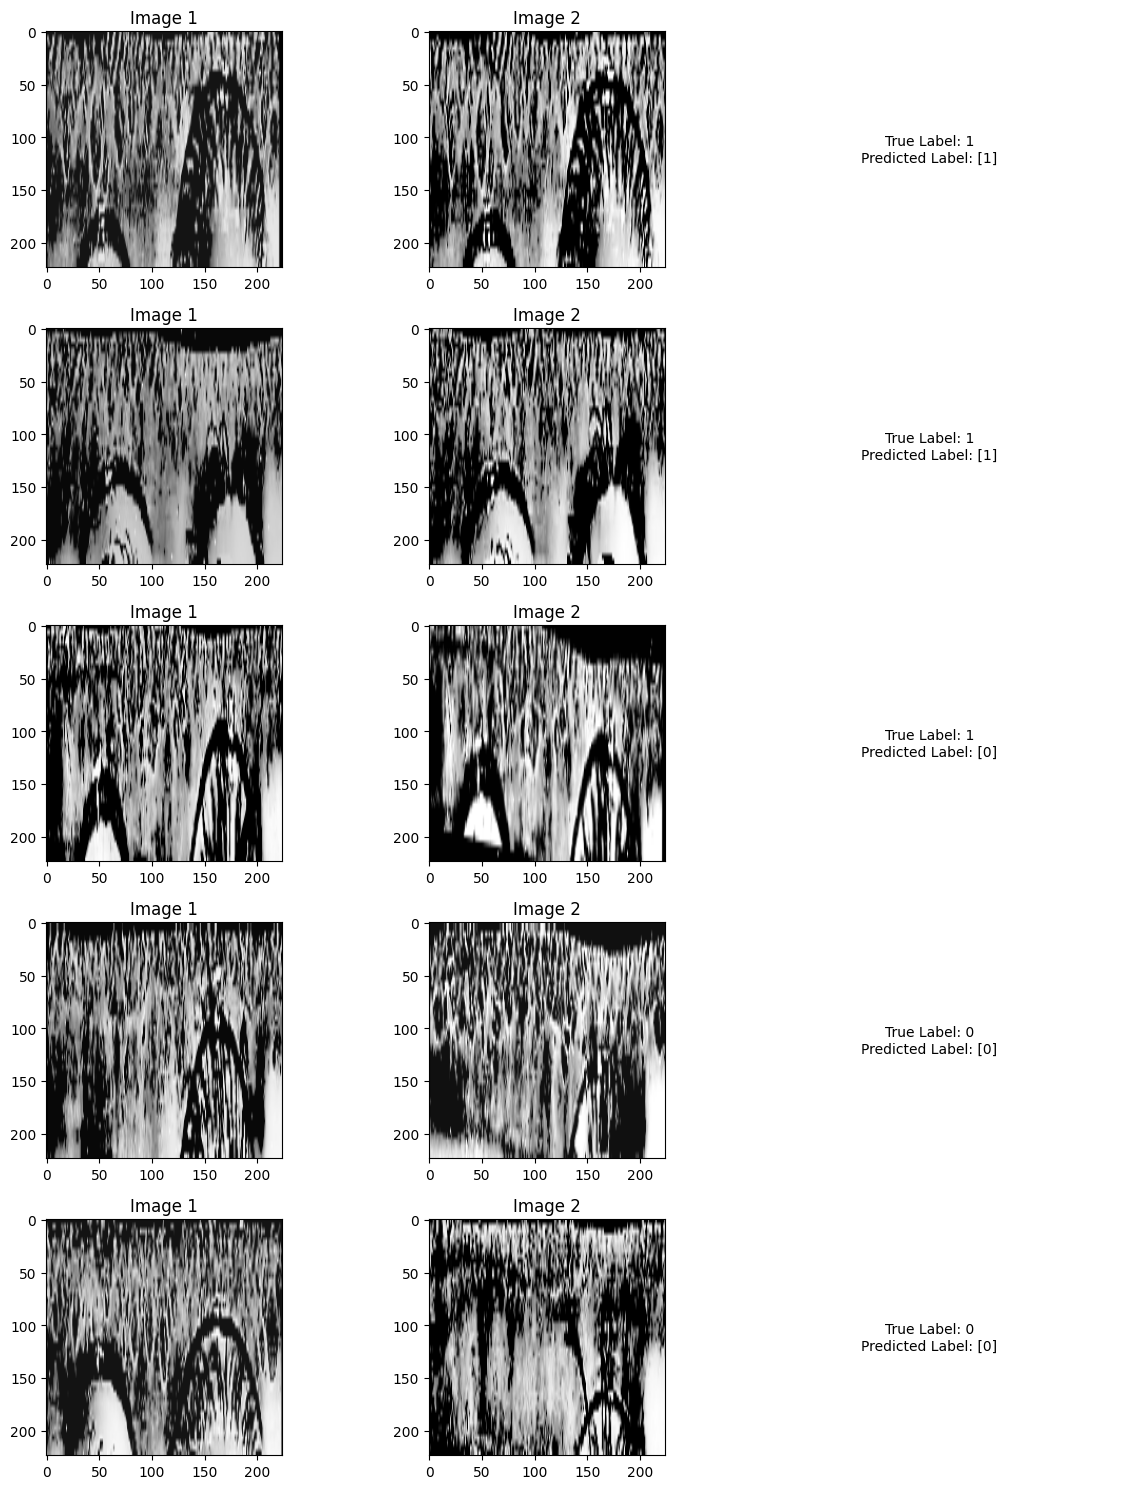

In [ ]:

num_inputs = min(len(image1), len(image2), 5)  # Limit to 5 inputs or the length of the shortest list/array

fig, axes = plt.subplots(num_inputs, 3, figsize=(12, 3*num_inputs))  # Adjust the figure size as needed

for i in range(num_inputs):
    # Set title for input


    # Display image 1
    axes[i, 0].imshow(image1[i].astype('uint8'))
    axes[i, 0].set_title('Image 1')

    # Display image 2
    axes[i, 1].imshow(image2[i].astype('uint8'))
    axes[i, 1].set_title('Image 2')

    # Display true label
    axes[i, 2].text(0.5, 0.5, f'True Label: {labels[i]}\nPredicted Label: {predictions[i]}',
                    horizontalalignment='center', verticalalignment='center')
    axes[i, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Save the plot as PNG
plt.savefig('plot.png')
plt.show()


In [ ]:
# image1 = load_and_process_image('200_2.bmp')
# image2 = load_and_process_image('200_4.bmp')

# # Expand dimensions to add batch dimension
# image1 = np.expand_dims(image1, axis=0)
# image2 = np.expand_dims(image2, axis=0)

# # Predict on the pair of images
# prediction = siamese_model.predict([image1, image2])
# # print(0 if prediction<0.5 else 1)
# print(prediction)

In [ ]:
siamese_vgg16.save('siamese_vgg16_LATEST.h5')

/home/zanam/.local/share/virtualenvs/iris-recog-OQNbWHVq/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


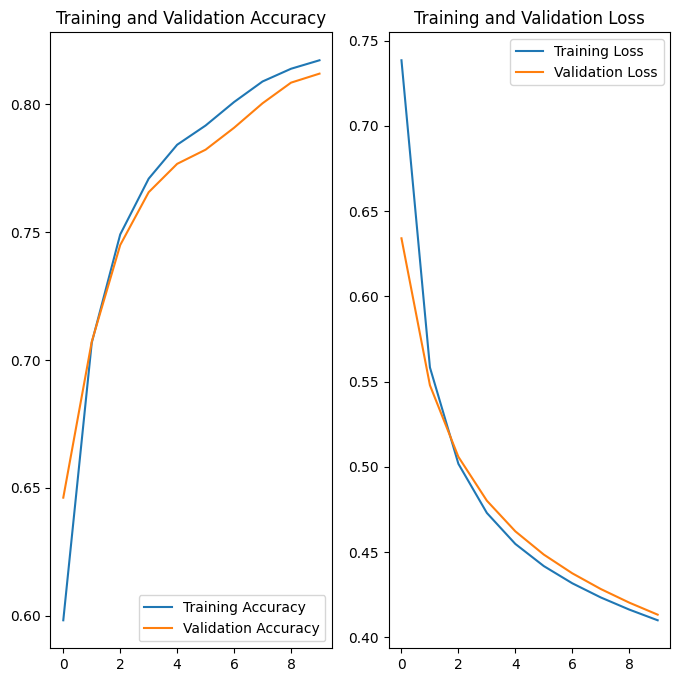

In [ ]:
plt.savefig('augmentationlayer_included.png')

<Figure size 640x480 with 0 Axes>

## FINETUNE

In [ ]:
base_model = VGG16(include_top=False, input_shape=(224,224,3),weights='imagenet')

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  19


In [ ]:
preprocess_input=tf.keras.applications.vgg16.preprocess_input
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable=False
pooling=layers.GlobalAveragePooling2D()
distance = layers.Lambda(lambda x: K.abs(x[0] - x[1]), name='distance')
prediction = layers.Dense(1, activation='sigmoid', name='output')

In [ ]:
input_shape=(224,224,3)
input_a = layers.Input(shape=input_shape, name='input_a')
input_b = layers.Input(shape=input_shape, name='input_b')
# preprocess_output_a=preprocess_input(input_a)
# preprocess_output_b=preprocess_input(input_b)

output_a=base_model(input_a,training=False)
output_b=base_model(input_b,training=False)

pooled_op_a=pooling(output_a)
pooled_op_b=pooling(output_b)

siamese=distance([pooled_op_a, pooled_op_b])
output=prediction(siamese)

model=tf.keras.Model(inputs=[input_a, input_b], outputs=output, name='siamese_vgg16')


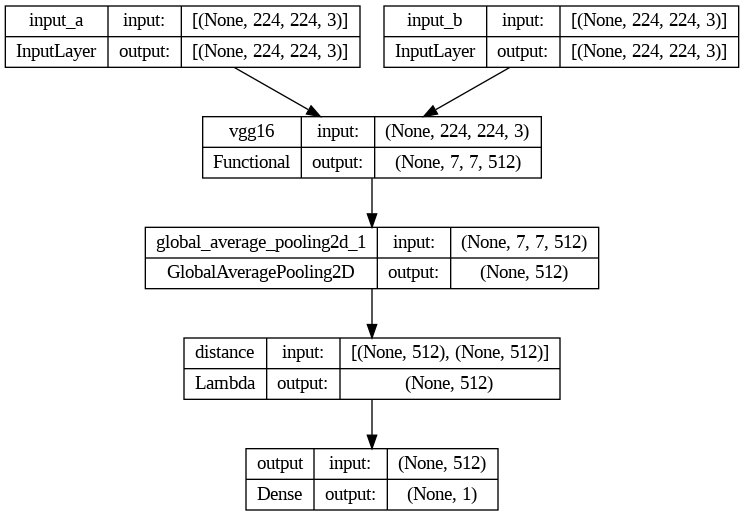

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
base_model.trainable=True

In [ ]:
fine_tune_at=10
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable=False

In [ ]:
# recompile the model
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=base_learning_rate),
              loss=binary_crossentropy,
              metrics=['accuracy'])


In [ ]:
# training after fine tuning
fine_tune_epochs = 5
initial_epochs = 10
total_epochs =  initial_epochs+ fine_tune_epochs

history_fine =siamese_vgg16.fit(train_ds,
                                verbose=1,
                  epochs=total_epochs,
                  initial_epoch=history.epoch[-1],
                  validation_data=val_ds)

Epoch 10/16
  1/279 [..............................] - ETA: 1:19:40 - loss: 0.4875 - accuracy: 0.8125

  3/279 [..............................] - ETA: 1:19 - loss: 0.3714 - accuracy: 0.8333

  5/279 [..............................] - ETA: 1:20 - loss: 0.4168 - accuracy: 0.8125

  7/279 [..............................] - ETA: 1:20 - loss: 0.4295 - accuracy: 0.8036

  9/279 [..............................] - ETA: 1:20 - loss: 0.4249 - accuracy: 0.8125

 11/279 [>.............................] - ETA: 1:19 - loss: 0.4334 - accuracy: 0.8040

 13/279 [>.............................] - ETA: 1:19 - loss: 0.4267 - accuracy: 0.8173

 15/279 [>.............................] - ETA: 1:18 - loss: 0.4374 - accuracy: 0.8000

 17/279 [>.............................] - ETA: 1:17 - loss: 0.4341 - accuracy: 0.8033

 19/279 [=>............................] - ETA: 1:17 - loss: 0.4331 - accuracy: 0.8010

 21/279 [=>............................] - ETA: 1:16 - loss: 0.4266 - accuracy: 0.8051

 23/279 [=>............................] - ETA: 1:16 - loss: 0.4191 - accuracy: 0.8139

 25/279 [=>............................] - ETA: 1:15 - loss: 0.4169 - accuracy: 0.8163

 27/279 [=>............................] - ETA: 1:15 - loss: 0.4139 - accuracy: 0.8137

 29/279 [==>...........................] - ETA: 1:14 - loss: 0.4155 - accuracy: 0.8125

 31/279 [==>...........................] - ETA: 1:14 - loss: 0.4143 - accuracy: 0.8145

 33/279 [==>...........................] - ETA: 1:13 - loss: 0.4121 - accuracy: 0.8172

 35/279 [==>...........................] - ETA: 1:13 - loss: 0.4106 - accuracy: 0.8179

 37/279 [==>...........................] - ETA: 1:12 - loss: 0.4132 - accuracy: 0.8159

 39/279 [===>..........................] - ETA: 1:12 - loss: 0.4153 - accuracy: 0.8165

 41/279 [===>..........................] - ETA: 1:11 - loss: 0.4252 - accuracy: 0.8102

 43/279 [===>..........................] - ETA: 1:11 - loss: 0.4226 - accuracy: 0.8103

 45/279 [===>..........................] - ETA: 1:10 - loss: 0.4195 - accuracy: 0.8132

 47/279 [====>.........................] - ETA: 1:09 - loss: 0.4202 - accuracy: 0.8138

 49/279 [====>.........................] - ETA: 1:09 - loss: 0.4147 - accuracy: 0.8176

 51/279 [====>.........................] - ETA: 1:08 - loss: 0.4141 - accuracy: 0.8168

 53/279 [====>.........................] - ETA: 1:08 - loss: 0.4098 - accuracy: 0.8190

 55/279 [====>.........................] - ETA: 1:07 - loss: 0.4102 - accuracy: 0.8170

 57/279 [=====>........................] - ETA: 1:07 - loss: 0.4096 - accuracy: 0.8174

 59/279 [=====>........................] - ETA: 1:06 - loss: 0.4113 - accuracy: 0.8173

 61/279 [=====>........................] - ETA: 1:05 - loss: 0.4118 - accuracy: 0.8171

 63/279 [=====>........................] - ETA: 1:05 - loss: 0.4097 - accuracy: 0.8175

 65/279 [=====>........................] - ETA: 1:04 - loss: 0.4070 - accuracy: 0.8188

 67/279 [======>.......................] - ETA: 1:04 - loss: 0.4044 - accuracy: 0.8209

 69/279 [======>.......................] - ETA: 1:03 - loss: 0.4082 - accuracy: 0.8193

 71/279 [======>.......................] - ETA: 1:03 - loss: 0.4071 - accuracy: 0.8200

 73/279 [======>.......................] - ETA: 1:02 - loss: 0.4086 - accuracy: 0.8198

 75/279 [=======>......................] - ETA: 1:02 - loss: 0.4073 - accuracy: 0.8208

 77/279 [=======>......................] - ETA: 1:01 - loss: 0.4069 - accuracy: 0.8206

 79/279 [=======>......................] - ETA: 1:01 - loss: 0.4062 - accuracy: 0.8204

 81/279 [=======>......................] - ETA: 1:00 - loss: 0.4076 - accuracy: 0.8206

 83/279 [=======>......................] - ETA: 59s - loss: 0.4064 - accuracy: 0.8219 

 85/279 [========>.....................] - ETA: 59s - loss: 0.4089 - accuracy: 0.8202

 87/279 [========>.....................] - ETA: 58s - loss: 0.4078 - accuracy: 0.8218

 89/279 [========>.....................] - ETA: 58s - loss: 0.4076 - accuracy: 0.8220

 91/279 [========>.....................] - ETA: 57s - loss: 0.4082 - accuracy: 0.8207

 93/279 [=========>....................] - ETA: 57s - loss: 0.4088 - accuracy: 0.8212

 95/279 [=========>....................] - ETA: 56s - loss: 0.4091 - accuracy: 0.8224

 97/279 [=========>....................] - ETA: 56s - loss: 0.4088 - accuracy: 0.8215

 99/279 [=========>....................] - ETA: 55s - loss: 0.4060 - accuracy: 0.8232

101/279 [=========>....................] - ETA: 54s - loss: 0.4057 - accuracy: 0.8236

103/279 [==========>...................] - ETA: 54s - loss: 0.4077 - accuracy: 0.8222

105/279 [==========>...................] - ETA: 53s - loss: 0.4093 - accuracy: 0.8223

107/279 [==========>...................] - ETA: 53s - loss: 0.4090 - accuracy: 0.8230

109/279 [==========>...................] - ETA: 52s - loss: 0.4095 - accuracy: 0.8222

111/279 [==========>...................] - ETA: 52s - loss: 0.4065 - accuracy: 0.8246

113/279 [===========>..................] - ETA: 51s - loss: 0.4063 - accuracy: 0.8244

115/279 [===========>..................] - ETA: 50s - loss: 0.4052 - accuracy: 0.8255

117/279 [===========>..................] - ETA: 50s - loss: 0.4060 - accuracy: 0.8248

119/279 [===========>..................] - ETA: 49s - loss: 0.4086 - accuracy: 0.8233

121/279 [============>.................] - ETA: 49s - loss: 0.4078 - accuracy: 0.8239

123/279 [============>.................] - ETA: 48s - loss: 0.4080 - accuracy: 0.8234

125/279 [============>.................] - ETA: 47s - loss: 0.4079 - accuracy: 0.8232

127/279 [============>.................] - ETA: 47s - loss: 0.4078 - accuracy: 0.8228

129/279 [============>.................] - ETA: 46s - loss: 0.4077 - accuracy: 0.8227

131/279 [=============>................] - ETA: 46s - loss: 0.4078 - accuracy: 0.8218

133/279 [=============>................] - ETA: 45s - loss: 0.4069 - accuracy: 0.8226

135/279 [=============>................] - ETA: 44s - loss: 0.4063 - accuracy: 0.8222

137/279 [=============>................] - ETA: 44s - loss: 0.4054 - accuracy: 0.8223

139/279 [=============>................] - ETA: 43s - loss: 0.4042 - accuracy: 0.8224

141/279 [==============>...............] - ETA: 43s - loss: 0.4049 - accuracy: 0.8220

143/279 [==============>...............] - ETA: 42s - loss: 0.4039 - accuracy: 0.8223

145/279 [==============>...............] - ETA: 41s - loss: 0.4025 - accuracy: 0.8235

147/279 [==============>...............] - ETA: 41s - loss: 0.4026 - accuracy: 0.8236

149/279 [===============>..............] - ETA: 40s - loss: 0.4020 - accuracy: 0.8247

151/279 [===============>..............] - ETA: 39s - loss: 0.4009 - accuracy: 0.8251

153/279 [===============>..............] - ETA: 39s - loss: 0.4005 - accuracy: 0.8254

155/279 [===============>..............] - ETA: 38s - loss: 0.4011 - accuracy: 0.8256

157/279 [===============>..............] - ETA: 37s - loss: 0.4000 - accuracy: 0.8262

159/279 [================>.............] - ETA: 37s - loss: 0.3989 - accuracy: 0.8270

161/279 [================>.............] - ETA: 36s - loss: 0.3990 - accuracy: 0.8263

163/279 [================>.............] - ETA: 36s - loss: 0.3983 - accuracy: 0.8269

165/279 [================>.............] - ETA: 35s - loss: 0.3994 - accuracy: 0.8263

167/279 [================>.............] - ETA: 34s - loss: 0.4007 - accuracy: 0.8260

169/279 [=================>............] - ETA: 34s - loss: 0.4008 - accuracy: 0.8262

171/279 [=================>............] - ETA: 33s - loss: 0.4001 - accuracy: 0.8264

173/279 [=================>............] - ETA: 32s - loss: 0.4001 - accuracy: 0.8262

175/279 [=================>............] - ETA: 32s - loss: 0.4015 - accuracy: 0.8250

177/279 [==================>...........] - ETA: 31s - loss: 0.4025 - accuracy: 0.8247

179/279 [==================>...........] - ETA: 31s - loss: 0.4020 - accuracy: 0.8249

181/279 [==================>...........] - ETA: 30s - loss: 0.4013 - accuracy: 0.8256

183/279 [==================>...........] - ETA: 29s - loss: 0.4005 - accuracy: 0.8255

185/279 [==================>...........] - ETA: 29s - loss: 0.4010 - accuracy: 0.8252

187/279 [===================>..........] - ETA: 28s - loss: 0.4004 - accuracy: 0.8252

189/279 [===================>..........] - ETA: 27s - loss: 0.4007 - accuracy: 0.8249

191/279 [===================>..........] - ETA: 27s - loss: 0.4009 - accuracy: 0.8246

193/279 [===================>..........] - ETA: 26s - loss: 0.4008 - accuracy: 0.8250

195/279 [===================>..........] - ETA: 26s - loss: 0.4000 - accuracy: 0.8255

197/279 [====================>.........] - ETA: 25s - loss: 0.3994 - accuracy: 0.8257

199/279 [====================>.........] - ETA: 24s - loss: 0.3985 - accuracy: 0.8258

201/279 [====================>.........] - ETA: 24s - loss: 0.3976 - accuracy: 0.8263

203/279 [====================>.........] - ETA: 23s - loss: 0.3980 - accuracy: 0.8257

205/279 [=====================>........] - ETA: 22s - loss: 0.3994 - accuracy: 0.8253

207/279 [=====================>........] - ETA: 22s - loss: 0.3994 - accuracy: 0.8256

209/279 [=====================>........] - ETA: 21s - loss: 0.3990 - accuracy: 0.8258

211/279 [=====================>........] - ETA: 21s - loss: 0.3987 - accuracy: 0.8261

213/279 [=====================>........] - ETA: 20s - loss: 0.3977 - accuracy: 0.8269

215/279 [======================>.......] - ETA: 19s - loss: 0.3989 - accuracy: 0.8259

217/279 [======================>.......] - ETA: 19s - loss: 0.3984 - accuracy: 0.8265

219/279 [======================>.......] - ETA: 18s - loss: 0.3994 - accuracy: 0.8261

221/279 [======================>.......] - ETA: 17s - loss: 0.3995 - accuracy: 0.8261

223/279 [======================>.......] - ETA: 17s - loss: 0.3989 - accuracy: 0.8265

225/279 [=======================>......] - ETA: 16s - loss: 0.3988 - accuracy: 0.8265

227/279 [=======================>......] - ETA: 16s - loss: 0.3992 - accuracy: 0.8261

229/279 [=======================>......] - ETA: 15s - loss: 0.3990 - accuracy: 0.8264

231/279 [=======================>......] - ETA: 14s - loss: 0.3996 - accuracy: 0.8266

233/279 [========================>.....] - ETA: 14s - loss: 0.4002 - accuracy: 0.8269

235/279 [========================>.....] - ETA: 13s - loss: 0.4004 - accuracy: 0.8269

237/279 [========================>.....] - ETA: 12s - loss: 0.4005 - accuracy: 0.8269

239/279 [========================>.....] - ETA: 12s - loss: 0.4000 - accuracy: 0.8269

241/279 [========================>.....] - ETA: 11s - loss: 0.3996 - accuracy: 0.8273

243/279 [=========================>....] - ETA: 11s - loss: 0.4005 - accuracy: 0.8266

245/279 [=========================>....] - ETA: 10s - loss: 0.3997 - accuracy: 0.8270

247/279 [=========================>....] - ETA: 9s - loss: 0.4002 - accuracy: 0.8270 

249/279 [=========================>....] - ETA: 9s - loss: 0.4005 - accuracy: 0.8269

251/279 [=========================>....] - ETA: 8s - loss: 0.4001 - accuracy: 0.8269

253/279 [==========================>...] - ETA: 8s - loss: 0.4010 - accuracy: 0.8262

255/279 [==========================>...] - ETA: 7s - loss: 0.4008 - accuracy: 0.8263

257/279 [==========================>...] - ETA: 6s - loss: 0.4012 - accuracy: 0.8260

259/279 [==========================>...] - ETA: 6s - loss: 0.4010 - accuracy: 0.8260

261/279 [===========================>..] - ETA: 5s - loss: 0.4013 - accuracy: 0.8256

263/279 [===========================>..] - ETA: 4s - loss: 0.4025 - accuracy: 0.8250

265/279 [===========================>..] - ETA: 4s - loss: 0.4028 - accuracy: 0.8250

267/279 [===========================>..] - ETA: 3s - loss: 0.4034 - accuracy: 0.8247

269/279 [===========================>..] - ETA: 3s - loss: 0.4040 - accuracy: 0.8247

271/279 [============================>.] - ETA: 2s - loss: 0.4044 - accuracy: 0.8244

273/279 [============================>.] - ETA: 1s - loss: 0.4051 - accuracy: 0.8241

275/279 [============================>.] - ETA: 1s - loss: 0.4058 - accuracy: 0.8238

277/279 [============================>.] - ETA: 0s - loss: 0.4059 - accuracy: 0.8237

279/279 [==============================] - 128s 400ms/step - loss: 0.4054 - accuracy: 0.8239 - val_loss: 0.4199 - val_accuracy: 0.8149
Epoch 11/16


  2/279 [..............................] - ETA: 1:20 - loss: 0.3985 - accuracy: 0.7969   

  4/279 [..............................] - ETA: 1:21 - loss: 0.3670 - accuracy: 0.8281

  6/279 [..............................] - ETA: 1:20 - loss: 0.4180 - accuracy: 0.7969

  8/279 [..............................] - ETA: 1:20 - loss: 0.4400 - accuracy: 0.7969

 10/279 [>.............................] - ETA: 1:19 - loss: 0.4353 - accuracy: 0.8000

 12/279 [>.............................] - ETA: 1:19 - loss: 0.4391 - accuracy: 0.8047

 14/279 [>.............................] - ETA: 1:18 - loss: 0.4361 - accuracy: 0.8013

 16/279 [>.............................] - ETA: 1:18 - loss: 0.4367 - accuracy: 0.8027

 18/279 [>.............................] - ETA: 1:17 - loss: 0.4463 - accuracy: 0.7969

 20/279 [=>............................] - ETA: 1:17 - loss: 0.4398 - accuracy: 0.8000

 22/279 [=>............................] - ETA: 1:16 - loss: 0.4278 - accuracy: 0.8097

 24/279 [=>............................] - ETA: 1:16 - loss: 0.4179 - accuracy: 0.8164

 26/279 [=>............................] - ETA: 1:15 - loss: 0.4195 - accuracy: 0.8101

 28/279 [==>...........................] - ETA: 1:15 - loss: 0.4188 - accuracy: 0.8103

 30/279 [==>...........................] - ETA: 1:14 - loss: 0.4169 - accuracy: 0.8125

 32/279 [==>...........................] - ETA: 1:14 - loss: 0.4112 - accuracy: 0.8174

 34/279 [==>...........................] - ETA: 1:13 - loss: 0.4117 - accuracy: 0.8180

 36/279 [==>...........................] - ETA: 1:13 - loss: 0.4115 - accuracy: 0.8220

 38/279 [===>..........................] - ETA: 1:12 - loss: 0.4181 - accuracy: 0.8183

 40/279 [===>..........................] - ETA: 1:12 - loss: 0.4176 - accuracy: 0.8195

 42/279 [===>..........................] - ETA: 1:11 - loss: 0.4182 - accuracy: 0.8170

 44/279 [===>..........................] - ETA: 1:10 - loss: 0.4159 - accuracy: 0.8182

 46/279 [===>..........................] - ETA: 1:10 - loss: 0.4135 - accuracy: 0.8207

 48/279 [====>.........................] - ETA: 1:09 - loss: 0.4097 - accuracy: 0.8249

 50/279 [====>.........................] - ETA: 1:09 - loss: 0.4084 - accuracy: 0.8244

 52/279 [====>.........................] - ETA: 1:08 - loss: 0.4089 - accuracy: 0.8233

 54/279 [====>.........................] - ETA: 1:08 - loss: 0.4046 - accuracy: 0.8252

 56/279 [=====>........................] - ETA: 1:07 - loss: 0.4059 - accuracy: 0.8231

 58/279 [=====>........................] - ETA: 1:07 - loss: 0.4076 - accuracy: 0.8217

 60/279 [=====>........................] - ETA: 1:06 - loss: 0.4080 - accuracy: 0.8208

 62/279 [=====>........................] - ETA: 1:06 - loss: 0.4074 - accuracy: 0.8211

 64/279 [=====>........................] - ETA: 1:05 - loss: 0.4053 - accuracy: 0.8228

 66/279 [======>.......................] - ETA: 1:04 - loss: 0.4025 - accuracy: 0.8239

 68/279 [======>.......................] - ETA: 1:04 - loss: 0.4010 - accuracy: 0.8244

 70/279 [======>.......................] - ETA: 1:03 - loss: 0.4040 - accuracy: 0.8228

 72/279 [======>.......................] - ETA: 1:03 - loss: 0.4048 - accuracy: 0.8234

 74/279 [======>.......................] - ETA: 1:02 - loss: 0.4058 - accuracy: 0.8226

 76/279 [=======>......................] - ETA: 1:02 - loss: 0.4039 - accuracy: 0.8240

 78/279 [=======>......................] - ETA: 1:01 - loss: 0.4029 - accuracy: 0.8241

 80/279 [=======>......................] - ETA: 1:01 - loss: 0.4010 - accuracy: 0.8254

 82/279 [=======>......................] - ETA: 1:00 - loss: 0.4003 - accuracy: 0.8266

 84/279 [========>.....................] - ETA: 1:00 - loss: 0.3996 - accuracy: 0.8266

 86/279 [========>.....................] - ETA: 59s - loss: 0.4019 - accuracy: 0.8252

 88/279 [========>.....................] - ETA: 58s - loss: 0.4017 - accuracy: 0.8274

 90/279 [========>.....................] - ETA: 58s - loss: 0.4014 - accuracy: 0.8278

 92/279 [========>.....................] - ETA: 57s - loss: 0.4032 - accuracy: 0.8288

 94/279 [=========>....................] - ETA: 57s - loss: 0.4026 - accuracy: 0.8295

 96/279 [=========>....................] - ETA: 56s - loss: 0.4037 - accuracy: 0.8288

 98/279 [=========>....................] - ETA: 56s - loss: 0.4024 - accuracy: 0.8294

100/279 [=========>....................] - ETA: 55s - loss: 0.3986 - accuracy: 0.8319

102/279 [=========>....................] - ETA: 54s - loss: 0.3988 - accuracy: 0.8318

104/279 [==========>...................] - ETA: 54s - loss: 0.4016 - accuracy: 0.8302

106/279 [==========>...................] - ETA: 53s - loss: 0.4019 - accuracy: 0.8308

108/279 [==========>...................] - ETA: 53s - loss: 0.4018 - accuracy: 0.8307

110/279 [==========>...................] - ETA: 52s - loss: 0.4001 - accuracy: 0.8315

112/279 [===========>..................] - ETA: 52s - loss: 0.3994 - accuracy: 0.8318

114/279 [===========>..................] - ETA: 51s - loss: 0.3999 - accuracy: 0.8314

116/279 [===========>..................] - ETA: 50s - loss: 0.4000 - accuracy: 0.8308

118/279 [===========>..................] - ETA: 50s - loss: 0.4030 - accuracy: 0.8289

120/279 [===========>..................] - ETA: 49s - loss: 0.4015 - accuracy: 0.8297

122/279 [============>.................] - ETA: 49s - loss: 0.4016 - accuracy: 0.8297

124/279 [============>.................] - ETA: 48s - loss: 0.4003 - accuracy: 0.8301

126/279 [============>.................] - ETA: 47s - loss: 0.4004 - accuracy: 0.8296

128/279 [============>.................] - ETA: 47s - loss: 0.4018 - accuracy: 0.8281

130/279 [============>.................] - ETA: 46s - loss: 0.4030 - accuracy: 0.8272

132/279 [=============>................] - ETA: 45s - loss: 0.4027 - accuracy: 0.8274

134/279 [=============>................] - ETA: 45s - loss: 0.4021 - accuracy: 0.8279

136/279 [=============>................] - ETA: 44s - loss: 0.4018 - accuracy: 0.8284

138/279 [=============>................] - ETA: 44s - loss: 0.4023 - accuracy: 0.8274

140/279 [==============>...............] - ETA: 43s - loss: 0.4012 - accuracy: 0.8281

142/279 [==============>...............] - ETA: 42s - loss: 0.4008 - accuracy: 0.8283

144/279 [==============>...............] - ETA: 42s - loss: 0.3991 - accuracy: 0.8294

146/279 [==============>...............] - ETA: 41s - loss: 0.3989 - accuracy: 0.8292

148/279 [==============>...............] - ETA: 40s - loss: 0.3986 - accuracy: 0.8302

150/279 [===============>..............] - ETA: 40s - loss: 0.3978 - accuracy: 0.8304

152/279 [===============>..............] - ETA: 39s - loss: 0.3975 - accuracy: 0.8310

154/279 [===============>..............] - ETA: 39s - loss: 0.3977 - accuracy: 0.8304

156/279 [===============>..............] - ETA: 38s - loss: 0.3969 - accuracy: 0.8303

158/279 [===============>..............] - ETA: 37s - loss: 0.3958 - accuracy: 0.8311

160/279 [================>.............] - ETA: 37s - loss: 0.3962 - accuracy: 0.8307

162/279 [================>.............] - ETA: 36s - loss: 0.3951 - accuracy: 0.8312

164/279 [================>.............] - ETA: 35s - loss: 0.3959 - accuracy: 0.8312

166/279 [================>.............] - ETA: 35s - loss: 0.3964 - accuracy: 0.8309

168/279 [=================>............] - ETA: 34s - loss: 0.3976 - accuracy: 0.8302

170/279 [=================>............] - ETA: 33s - loss: 0.3969 - accuracy: 0.8307

172/279 [=================>............] - ETA: 33s - loss: 0.3967 - accuracy: 0.8312

174/279 [=================>............] - ETA: 32s - loss: 0.3972 - accuracy: 0.8312

176/279 [=================>............] - ETA: 32s - loss: 0.3973 - accuracy: 0.8311

178/279 [==================>...........] - ETA: 31s - loss: 0.3979 - accuracy: 0.8308

180/279 [==================>...........] - ETA: 30s - loss: 0.3962 - accuracy: 0.8314

182/279 [==================>...........] - ETA: 30s - loss: 0.3956 - accuracy: 0.8314

184/279 [==================>...........] - ETA: 29s - loss: 0.3951 - accuracy: 0.8312

186/279 [===================>..........] - ETA: 28s - loss: 0.3954 - accuracy: 0.8308

188/279 [===================>..........] - ETA: 28s - loss: 0.3959 - accuracy: 0.8301

190/279 [===================>..........] - ETA: 27s - loss: 0.3964 - accuracy: 0.8296

192/279 [===================>..........] - ETA: 27s - loss: 0.3968 - accuracy: 0.8294

194/279 [===================>..........] - ETA: 26s - loss: 0.3964 - accuracy: 0.8297

196/279 [====================>.........] - ETA: 25s - loss: 0.3951 - accuracy: 0.8307

198/279 [====================>.........] - ETA: 25s - loss: 0.3945 - accuracy: 0.8311

200/279 [====================>.........] - ETA: 24s - loss: 0.3929 - accuracy: 0.8320

202/279 [====================>.........] - ETA: 23s - loss: 0.3922 - accuracy: 0.8326

204/279 [====================>.........] - ETA: 23s - loss: 0.3925 - accuracy: 0.8320

206/279 [=====================>........] - ETA: 22s - loss: 0.3937 - accuracy: 0.8315

208/279 [=====================>........] - ETA: 22s - loss: 0.3942 - accuracy: 0.8313

210/279 [=====================>........] - ETA: 21s - loss: 0.3947 - accuracy: 0.8311

212/279 [=====================>........] - ETA: 20s - loss: 0.3936 - accuracy: 0.8314

214/279 [======================>.......] - ETA: 20s - loss: 0.3934 - accuracy: 0.8310

216/279 [======================>.......] - ETA: 19s - loss: 0.3941 - accuracy: 0.8309

218/279 [======================>.......] - ETA: 18s - loss: 0.3945 - accuracy: 0.8306

220/279 [======================>.......] - ETA: 18s - loss: 0.3946 - accuracy: 0.8304

222/279 [======================>.......] - ETA: 17s - loss: 0.3946 - accuracy: 0.8304

224/279 [=======================>......] - ETA: 17s - loss: 0.3937 - accuracy: 0.8309

226/279 [=======================>......] - ETA: 16s - loss: 0.3942 - accuracy: 0.8308

228/279 [=======================>......] - ETA: 15s - loss: 0.3945 - accuracy: 0.8300

230/279 [=======================>......] - ETA: 15s - loss: 0.3948 - accuracy: 0.8300

232/279 [=======================>......] - ETA: 14s - loss: 0.3954 - accuracy: 0.8295

234/279 [========================>.....] - ETA: 13s - loss: 0.3960 - accuracy: 0.8297

236/279 [========================>.....] - ETA: 13s - loss: 0.3958 - accuracy: 0.8296

238/279 [========================>.....] - ETA: 12s - loss: 0.3957 - accuracy: 0.8298

240/279 [========================>.....] - ETA: 12s - loss: 0.3949 - accuracy: 0.8298

242/279 [=========================>....] - ETA: 11s - loss: 0.3944 - accuracy: 0.8303

244/279 [=========================>....] - ETA: 10s - loss: 0.3950 - accuracy: 0.8298

246/279 [=========================>....] - ETA: 10s - loss: 0.3948 - accuracy: 0.8302

248/279 [=========================>....] - ETA: 9s - loss: 0.3955 - accuracy: 0.8298

250/279 [=========================>....] - ETA: 8s - loss: 0.3953 - accuracy: 0.8298

252/279 [==========================>...] - ETA: 8s - loss: 0.3952 - accuracy: 0.8297

254/279 [==========================>...] - ETA: 7s - loss: 0.3957 - accuracy: 0.8296

256/279 [==========================>...] - ETA: 7s - loss: 0.3965 - accuracy: 0.8290

258/279 [==========================>...] - ETA: 6s - loss: 0.3965 - accuracy: 0.8290

260/279 [==========================>...] - ETA: 5s - loss: 0.3959 - accuracy: 0.8294

262/279 [===========================>..] - ETA: 5s - loss: 0.3967 - accuracy: 0.8287

264/279 [===========================>..] - ETA: 4s - loss: 0.3969 - accuracy: 0.8287

266/279 [===========================>..] - ETA: 4s - loss: 0.3965 - accuracy: 0.8291

268/279 [===========================>..] - ETA: 3s - loss: 0.3978 - accuracy: 0.8285

270/279 [============================>.] - ETA: 2s - loss: 0.3973 - accuracy: 0.8288

272/279 [============================>.] - ETA: 2s - loss: 0.3977 - accuracy: 0.8288

274/279 [============================>.] - ETA: 1s - loss: 0.3982 - accuracy: 0.8285

276/279 [============================>.] - ETA: 0s - loss: 0.3991 - accuracy: 0.8280

278/279 [============================>.] - ETA: 0s - loss: 0.3988 - accuracy: 0.8281

279/279 [==============================] - 144s 456ms/step - loss: 0.3987 - accuracy: 0.8283 - val_loss: 0.4120 - val_accuracy: 0.8149
Epoch 12/16
  1/279 [..............................] - ETA: 1:18:57 - loss: 0.4150 - accuracy: 0.8438

  3/279 [..............................] - ETA: 1:20 - loss: 0.3244 - accuracy: 0.8750

  5/279 [..............................] - ETA: 1:20 - loss: 0.3908 - accuracy: 0.8250

  7/279 [..............................] - ETA: 1:20 - loss: 0.4063 - accuracy: 0.8036

  9/279 [..............................] - ETA: 1:20 - loss: 0.4065 - accuracy: 0.8056

 11/279 [>.............................] - ETA: 1:19 - loss: 0.4124 - accuracy: 0.8068

 13/279 [>.............................] - ETA: 1:19 - loss: 0.4046 - accuracy: 0.8221

 15/279 [>.............................] - ETA: 1:18 - loss: 0.4097 - accuracy: 0.8146

 17/279 [>.............................] - ETA: 1:17 - loss: 0.4129 - accuracy: 0.8125

 19/279 [=>............................] - ETA: 1:17 - loss: 0.4119 - accuracy: 0.8125

 21/279 [=>............................] - ETA: 1:16 - loss: 0.4106 - accuracy: 0.8170

 23/279 [=>............................] - ETA: 1:16 - loss: 0.4060 - accuracy: 0.8207

 25/279 [=>............................] - ETA: 1:15 - loss: 0.4044 - accuracy: 0.8175

 27/279 [=>............................] - ETA: 1:15 - loss: 0.4002 - accuracy: 0.8206

 29/279 [==>...........................] - ETA: 1:14 - loss: 0.4024 - accuracy: 0.8179

 31/279 [==>...........................] - ETA: 1:14 - loss: 0.3994 - accuracy: 0.8236

 33/279 [==>...........................] - ETA: 1:13 - loss: 0.3945 - accuracy: 0.8258

 35/279 [==>...........................] - ETA: 1:13 - loss: 0.3931 - accuracy: 0.8268

 37/279 [==>...........................] - ETA: 1:12 - loss: 0.3981 - accuracy: 0.8243

 39/279 [===>..........................] - ETA: 1:12 - loss: 0.3957 - accuracy: 0.8293

 41/279 [===>..........................] - ETA: 1:11 - loss: 0.4051 - accuracy: 0.8224

 43/279 [===>..........................] - ETA: 1:10 - loss: 0.4050 - accuracy: 0.8219

 45/279 [===>..........................] - ETA: 1:10 - loss: 0.4035 - accuracy: 0.8222

 47/279 [====>.........................] - ETA: 1:09 - loss: 0.4049 - accuracy: 0.8205

 49/279 [====>.........................] - ETA: 1:09 - loss: 0.4007 - accuracy: 0.8246

 51/279 [====>.........................] - ETA: 1:08 - loss: 0.4004 - accuracy: 0.8217

 53/279 [====>.........................] - ETA: 1:08 - loss: 0.3953 - accuracy: 0.8249

 55/279 [====>.........................] - ETA: 1:07 - loss: 0.3971 - accuracy: 0.8233

 57/279 [=====>........................] - ETA: 1:07 - loss: 0.3990 - accuracy: 0.8235

 59/279 [=====>........................] - ETA: 1:06 - loss: 0.3996 - accuracy: 0.8226

 61/279 [=====>........................] - ETA: 1:05 - loss: 0.4013 - accuracy: 0.8217

 63/279 [=====>........................] - ETA: 1:05 - loss: 0.4019 - accuracy: 0.8224

 65/279 [=====>........................] - ETA: 1:04 - loss: 0.4011 - accuracy: 0.8221

 67/279 [======>.......................] - ETA: 1:04 - loss: 0.3988 - accuracy: 0.8237

 69/279 [======>.......................] - ETA: 1:03 - loss: 0.4026 - accuracy: 0.8211

 71/279 [======>.......................] - ETA: 1:03 - loss: 0.4011 - accuracy: 0.8231

 73/279 [======>.......................] - ETA: 1:02 - loss: 0.4003 - accuracy: 0.8245

 75/279 [=======>......................] - ETA: 1:02 - loss: 0.3980 - accuracy: 0.8246

 77/279 [=======>......................] - ETA: 1:01 - loss: 0.3977 - accuracy: 0.8251

 79/279 [=======>......................] - ETA: 1:01 - loss: 0.3962 - accuracy: 0.8252

 81/279 [=======>......................] - ETA: 1:00 - loss: 0.3956 - accuracy: 0.8256

 83/279 [=======>......................] - ETA: 59s - loss: 0.3950 - accuracy: 0.8261 

 85/279 [========>.....................] - ETA: 59s - loss: 0.3983 - accuracy: 0.8224

 87/279 [========>.....................] - ETA: 58s - loss: 0.3975 - accuracy: 0.8236

 89/279 [========>.....................] - ETA: 58s - loss: 0.3990 - accuracy: 0.8230

 91/279 [========>.....................] - ETA: 57s - loss: 0.3996 - accuracy: 0.8225

 93/279 [=========>....................] - ETA: 57s - loss: 0.3979 - accuracy: 0.8219

 95/279 [=========>....................] - ETA: 56s - loss: 0.3990 - accuracy: 0.8214

 97/279 [=========>....................] - ETA: 56s - loss: 0.3986 - accuracy: 0.8215

 99/279 [=========>....................] - ETA: 55s - loss: 0.3952 - accuracy: 0.8235

101/279 [=========>....................] - ETA: 54s - loss: 0.3947 - accuracy: 0.8239

103/279 [==========>...................] - ETA: 54s - loss: 0.3965 - accuracy: 0.8231

105/279 [==========>...................] - ETA: 53s - loss: 0.3982 - accuracy: 0.8232

107/279 [==========>...................] - ETA: 53s - loss: 0.3969 - accuracy: 0.8245

109/279 [==========>...................] - ETA: 52s - loss: 0.3967 - accuracy: 0.8245

111/279 [==========>...................] - ETA: 52s - loss: 0.3945 - accuracy: 0.8266

113/279 [===========>..................] - ETA: 51s - loss: 0.3954 - accuracy: 0.8261

115/279 [===========>..................] - ETA: 50s - loss: 0.3936 - accuracy: 0.8269

117/279 [===========>..................] - ETA: 50s - loss: 0.3940 - accuracy: 0.8259

119/279 [===========>..................] - ETA: 49s - loss: 0.3960 - accuracy: 0.8254

121/279 [============>.................] - ETA: 49s - loss: 0.3949 - accuracy: 0.8267

123/279 [============>.................] - ETA: 48s - loss: 0.3945 - accuracy: 0.8267

125/279 [============>.................] - ETA: 47s - loss: 0.3946 - accuracy: 0.8265

127/279 [============>.................] - ETA: 47s - loss: 0.3954 - accuracy: 0.8250

129/279 [============>.................] - ETA: 46s - loss: 0.3955 - accuracy: 0.8246

131/279 [=============>................] - ETA: 46s - loss: 0.3954 - accuracy: 0.8242

133/279 [=============>................] - ETA: 45s - loss: 0.3959 - accuracy: 0.8245

135/279 [=============>................] - ETA: 44s - loss: 0.3950 - accuracy: 0.8257

137/279 [=============>................] - ETA: 44s - loss: 0.3941 - accuracy: 0.8262

139/279 [=============>................] - ETA: 43s - loss: 0.3935 - accuracy: 0.8262

141/279 [==============>...............] - ETA: 42s - loss: 0.3938 - accuracy: 0.8260

143/279 [==============>...............] - ETA: 42s - loss: 0.3934 - accuracy: 0.8263

145/279 [==============>...............] - ETA: 41s - loss: 0.3929 - accuracy: 0.8269

147/279 [==============>...............] - ETA: 41s - loss: 0.3938 - accuracy: 0.8263

149/279 [===============>..............] - ETA: 40s - loss: 0.3934 - accuracy: 0.8266

151/279 [===============>..............] - ETA: 39s - loss: 0.3932 - accuracy: 0.8268

153/279 [===============>..............] - ETA: 39s - loss: 0.3936 - accuracy: 0.8270

155/279 [===============>..............] - ETA: 38s - loss: 0.3939 - accuracy: 0.8270

157/279 [===============>..............] - ETA: 38s - loss: 0.3928 - accuracy: 0.8274

159/279 [================>.............] - ETA: 37s - loss: 0.3930 - accuracy: 0.8276

161/279 [================>.............] - ETA: 36s - loss: 0.3934 - accuracy: 0.8274

163/279 [================>.............] - ETA: 36s - loss: 0.3923 - accuracy: 0.8278

165/279 [================>.............] - ETA: 35s - loss: 0.3939 - accuracy: 0.8269

167/279 [================>.............] - ETA: 34s - loss: 0.3949 - accuracy: 0.8265

169/279 [=================>............] - ETA: 34s - loss: 0.3945 - accuracy: 0.8267

171/279 [=================>............] - ETA: 33s - loss: 0.3937 - accuracy: 0.8273

173/279 [=================>............] - ETA: 32s - loss: 0.3941 - accuracy: 0.8275

175/279 [=================>............] - ETA: 32s - loss: 0.3952 - accuracy: 0.8271

177/279 [==================>...........] - ETA: 31s - loss: 0.3959 - accuracy: 0.8268

179/279 [==================>...........] - ETA: 31s - loss: 0.3952 - accuracy: 0.8275

181/279 [==================>...........] - ETA: 30s - loss: 0.3943 - accuracy: 0.8277

183/279 [==================>...........] - ETA: 29s - loss: 0.3933 - accuracy: 0.8287

185/279 [==================>...........] - ETA: 29s - loss: 0.3935 - accuracy: 0.8282

187/279 [===================>..........] - ETA: 28s - loss: 0.3928 - accuracy: 0.8284

189/279 [===================>..........] - ETA: 27s - loss: 0.3936 - accuracy: 0.8279

191/279 [===================>..........] - ETA: 27s - loss: 0.3934 - accuracy: 0.8277

193/279 [===================>..........] - ETA: 26s - loss: 0.3939 - accuracy: 0.8277

195/279 [===================>..........] - ETA: 26s - loss: 0.3929 - accuracy: 0.8284

197/279 [====================>.........] - ETA: 25s - loss: 0.3928 - accuracy: 0.8284

199/279 [====================>.........] - ETA: 24s - loss: 0.3916 - accuracy: 0.8293

201/279 [====================>.........] - ETA: 24s - loss: 0.3904 - accuracy: 0.8298

203/279 [====================>.........] - ETA: 23s - loss: 0.3909 - accuracy: 0.8296

205/279 [=====================>........] - ETA: 22s - loss: 0.3925 - accuracy: 0.8291

207/279 [=====================>........] - ETA: 22s - loss: 0.3929 - accuracy: 0.8291

209/279 [=====================>........] - ETA: 21s - loss: 0.3925 - accuracy: 0.8292

211/279 [=====================>........] - ETA: 21s - loss: 0.3929 - accuracy: 0.8291

213/279 [=====================>........] - ETA: 20s - loss: 0.3917 - accuracy: 0.8303

215/279 [======================>.......] - ETA: 19s - loss: 0.3930 - accuracy: 0.8297

217/279 [======================>.......] - ETA: 19s - loss: 0.3924 - accuracy: 0.8299

219/279 [======================>.......] - ETA: 18s - loss: 0.3935 - accuracy: 0.8298

221/279 [======================>.......] - ETA: 17s - loss: 0.3932 - accuracy: 0.8300

223/279 [======================>.......] - ETA: 17s - loss: 0.3927 - accuracy: 0.8299

225/279 [=======================>......] - ETA: 16s - loss: 0.3928 - accuracy: 0.8300

227/279 [=======================>......] - ETA: 16s - loss: 0.3934 - accuracy: 0.8293

229/279 [=======================>......] - ETA: 15s - loss: 0.3931 - accuracy: 0.8291

231/279 [=======================>......] - ETA: 14s - loss: 0.3942 - accuracy: 0.8289

233/279 [========================>.....] - ETA: 14s - loss: 0.3950 - accuracy: 0.8287

235/279 [========================>.....] - ETA: 13s - loss: 0.3948 - accuracy: 0.8289

237/279 [========================>.....] - ETA: 12s - loss: 0.3943 - accuracy: 0.8292

239/279 [========================>.....] - ETA: 12s - loss: 0.3940 - accuracy: 0.8294

241/279 [========================>.....] - ETA: 11s - loss: 0.3934 - accuracy: 0.8297

243/279 [=========================>....] - ETA: 11s - loss: 0.3935 - accuracy: 0.8296

245/279 [=========================>....] - ETA: 10s - loss: 0.3930 - accuracy: 0.8301

247/279 [=========================>....] - ETA: 9s - loss: 0.3932 - accuracy: 0.8300 

249/279 [=========================>....] - ETA: 9s - loss: 0.3931 - accuracy: 0.8301

251/279 [=========================>....] - ETA: 8s - loss: 0.3925 - accuracy: 0.8308

253/279 [==========================>...] - ETA: 8s - loss: 0.3928 - accuracy: 0.8304

255/279 [==========================>...] - ETA: 7s - loss: 0.3925 - accuracy: 0.8306

257/279 [==========================>...] - ETA: 6s - loss: 0.3934 - accuracy: 0.8306

259/279 [==========================>...] - ETA: 6s - loss: 0.3934 - accuracy: 0.8306

261/279 [===========================>..] - ETA: 5s - loss: 0.3937 - accuracy: 0.8306

263/279 [===========================>..] - ETA: 4s - loss: 0.3948 - accuracy: 0.8298

265/279 [===========================>..] - ETA: 4s - loss: 0.3953 - accuracy: 0.8297

267/279 [===========================>..] - ETA: 3s - loss: 0.3955 - accuracy: 0.8299

269/279 [===========================>..] - ETA: 3s - loss: 0.3961 - accuracy: 0.8295

271/279 [============================>.] - ETA: 2s - loss: 0.3964 - accuracy: 0.8290

273/279 [============================>.] - ETA: 1s - loss: 0.3973 - accuracy: 0.8288

275/279 [============================>.] - ETA: 1s - loss: 0.3978 - accuracy: 0.8284

277/279 [============================>.] - ETA: 0s - loss: 0.3981 - accuracy: 0.8284

279/279 [==============================] - 144s 455ms/step - loss: 0.3976 - accuracy: 0.8286 - val_loss: 0.4021 - val_accuracy: 0.8253
Epoch 13/16


  2/279 [..............................] - ETA: 1:20 - loss: 0.3811 - accuracy: 0.8281   

  4/279 [..............................] - ETA: 1:21 - loss: 0.3885 - accuracy: 0.8359

  6/279 [..............................] - ETA: 1:20 - loss: 0.4164 - accuracy: 0.8125

  8/279 [..............................] - ETA: 1:20 - loss: 0.4247 - accuracy: 0.8086

 10/279 [>.............................] - ETA: 1:19 - loss: 0.4165 - accuracy: 0.8000

 12/279 [>.............................] - ETA: 1:19 - loss: 0.4195 - accuracy: 0.8047

 14/279 [>.............................] - ETA: 1:18 - loss: 0.4139 - accuracy: 0.8058

 16/279 [>.............................] - ETA: 1:18 - loss: 0.4123 - accuracy: 0.8047

 18/279 [>.............................] - ETA: 1:17 - loss: 0.4161 - accuracy: 0.8056

 20/279 [=>............................] - ETA: 1:17 - loss: 0.4072 - accuracy: 0.8047

 22/279 [=>............................] - ETA: 1:16 - loss: 0.4037 - accuracy: 0.8054

 24/279 [=>............................] - ETA: 1:16 - loss: 0.3943 - accuracy: 0.8112

 26/279 [=>............................] - ETA: 1:15 - loss: 0.3941 - accuracy: 0.8077

 28/279 [==>...........................] - ETA: 1:15 - loss: 0.3923 - accuracy: 0.8114

 30/279 [==>...........................] - ETA: 1:14 - loss: 0.3942 - accuracy: 0.8083

 32/279 [==>...........................] - ETA: 1:14 - loss: 0.3899 - accuracy: 0.8115

 34/279 [==>...........................] - ETA: 1:13 - loss: 0.3914 - accuracy: 0.8153

 36/279 [==>...........................] - ETA: 1:13 - loss: 0.3932 - accuracy: 0.8160

 38/279 [===>..........................] - ETA: 1:12 - loss: 0.3973 - accuracy: 0.8158

 40/279 [===>..........................] - ETA: 1:11 - loss: 0.3980 - accuracy: 0.8164

 42/279 [===>..........................] - ETA: 1:11 - loss: 0.3996 - accuracy: 0.8155

 44/279 [===>..........................] - ETA: 1:10 - loss: 0.3976 - accuracy: 0.8168

 46/279 [===>..........................] - ETA: 1:10 - loss: 0.3988 - accuracy: 0.8166

 48/279 [====>.........................] - ETA: 1:09 - loss: 0.3965 - accuracy: 0.8164

 50/279 [====>.........................] - ETA: 1:09 - loss: 0.3936 - accuracy: 0.8188

 52/279 [====>.........................] - ETA: 1:08 - loss: 0.3912 - accuracy: 0.8209

 54/279 [====>.........................] - ETA: 1:07 - loss: 0.3909 - accuracy: 0.8206

 56/279 [=====>........................] - ETA: 1:07 - loss: 0.3907 - accuracy: 0.8214

 58/279 [=====>........................] - ETA: 1:06 - loss: 0.3927 - accuracy: 0.8206

 60/279 [=====>........................] - ETA: 1:06 - loss: 0.3940 - accuracy: 0.8203

 62/279 [=====>........................] - ETA: 1:05 - loss: 0.3937 - accuracy: 0.8221

 64/279 [=====>........................] - ETA: 1:05 - loss: 0.3911 - accuracy: 0.8237

 66/279 [======>.......................] - ETA: 1:04 - loss: 0.3890 - accuracy: 0.8239

 68/279 [======>.......................] - ETA: 1:04 - loss: 0.3881 - accuracy: 0.8244

 70/279 [======>.......................] - ETA: 1:03 - loss: 0.3902 - accuracy: 0.8241

 72/279 [======>.......................] - ETA: 1:03 - loss: 0.3912 - accuracy: 0.8238

 74/279 [======>.......................] - ETA: 1:02 - loss: 0.3909 - accuracy: 0.8239

 76/279 [=======>......................] - ETA: 1:01 - loss: 0.3895 - accuracy: 0.8252

 78/279 [=======>......................] - ETA: 1:01 - loss: 0.3881 - accuracy: 0.8261

 80/279 [=======>......................] - ETA: 1:00 - loss: 0.3872 - accuracy: 0.8273

 82/279 [=======>......................] - ETA: 1:00 - loss: 0.3866 - accuracy: 0.8274

 84/279 [========>.....................] - ETA: 59s - loss: 0.3859 - accuracy: 0.8274 

 86/279 [========>.....................] - ETA: 59s - loss: 0.3879 - accuracy: 0.8263

 88/279 [========>.....................] - ETA: 58s - loss: 0.3867 - accuracy: 0.8281

 90/279 [========>.....................] - ETA: 58s - loss: 0.3861 - accuracy: 0.8288

 92/279 [========>.....................] - ETA: 57s - loss: 0.3868 - accuracy: 0.8295

 94/279 [=========>....................] - ETA: 56s - loss: 0.3867 - accuracy: 0.8308

 96/279 [=========>....................] - ETA: 56s - loss: 0.3867 - accuracy: 0.8314

 98/279 [=========>....................] - ETA: 55s - loss: 0.3866 - accuracy: 0.8307

100/279 [=========>....................] - ETA: 55s - loss: 0.3838 - accuracy: 0.8319

102/279 [=========>....................] - ETA: 54s - loss: 0.3843 - accuracy: 0.8318

104/279 [==========>...................] - ETA: 54s - loss: 0.3877 - accuracy: 0.8299

106/279 [==========>...................] - ETA: 53s - loss: 0.3884 - accuracy: 0.8293

108/279 [==========>...................] - ETA: 52s - loss: 0.3880 - accuracy: 0.8293

110/279 [==========>...................] - ETA: 52s - loss: 0.3867 - accuracy: 0.8304

112/279 [===========>..................] - ETA: 51s - loss: 0.3866 - accuracy: 0.8309

114/279 [===========>..................] - ETA: 51s - loss: 0.3868 - accuracy: 0.8300

116/279 [===========>..................] - ETA: 50s - loss: 0.3881 - accuracy: 0.8292

118/279 [===========>..................] - ETA: 50s - loss: 0.3908 - accuracy: 0.8276

120/279 [===========>..................] - ETA: 49s - loss: 0.3890 - accuracy: 0.8281

122/279 [============>.................] - ETA: 48s - loss: 0.3901 - accuracy: 0.8279

124/279 [============>.................] - ETA: 48s - loss: 0.3897 - accuracy: 0.8284

126/279 [============>.................] - ETA: 47s - loss: 0.3893 - accuracy: 0.8281

128/279 [============>.................] - ETA: 47s - loss: 0.3903 - accuracy: 0.8274

130/279 [============>.................] - ETA: 46s - loss: 0.3917 - accuracy: 0.8272

132/279 [=============>................] - ETA: 45s - loss: 0.3906 - accuracy: 0.8284

134/279 [=============>................] - ETA: 45s - loss: 0.3900 - accuracy: 0.8295

136/279 [=============>................] - ETA: 44s - loss: 0.3887 - accuracy: 0.8304

138/279 [=============>................] - ETA: 43s - loss: 0.3895 - accuracy: 0.8297

140/279 [==============>...............] - ETA: 43s - loss: 0.3886 - accuracy: 0.8299

142/279 [==============>...............] - ETA: 42s - loss: 0.3883 - accuracy: 0.8299

144/279 [==============>...............] - ETA: 42s - loss: 0.3864 - accuracy: 0.8309

146/279 [==============>...............] - ETA: 41s - loss: 0.3861 - accuracy: 0.8313

148/279 [==============>...............] - ETA: 40s - loss: 0.3856 - accuracy: 0.8319

150/279 [===============>..............] - ETA: 40s - loss: 0.3843 - accuracy: 0.8325

152/279 [===============>..............] - ETA: 39s - loss: 0.3840 - accuracy: 0.8326

154/279 [===============>..............] - ETA: 38s - loss: 0.3844 - accuracy: 0.8324

156/279 [===============>..............] - ETA: 38s - loss: 0.3837 - accuracy: 0.8323

158/279 [===============>..............] - ETA: 37s - loss: 0.3823 - accuracy: 0.8335

160/279 [================>.............] - ETA: 37s - loss: 0.3826 - accuracy: 0.8336

162/279 [================>.............] - ETA: 36s - loss: 0.3815 - accuracy: 0.8341

164/279 [================>.............] - ETA: 35s - loss: 0.3822 - accuracy: 0.8338

166/279 [================>.............] - ETA: 35s - loss: 0.3830 - accuracy: 0.8332

168/279 [=================>............] - ETA: 34s - loss: 0.3835 - accuracy: 0.8333

170/279 [=================>............] - ETA: 33s - loss: 0.3834 - accuracy: 0.8333

172/279 [=================>............] - ETA: 33s - loss: 0.3842 - accuracy: 0.8336

174/279 [=================>............] - ETA: 32s - loss: 0.3850 - accuracy: 0.8337

176/279 [=================>............] - ETA: 32s - loss: 0.3855 - accuracy: 0.8333

178/279 [==================>...........] - ETA: 31s - loss: 0.3867 - accuracy: 0.8323

180/279 [==================>...........] - ETA: 30s - loss: 0.3851 - accuracy: 0.8335

182/279 [==================>...........] - ETA: 30s - loss: 0.3853 - accuracy: 0.8338

184/279 [==================>...........] - ETA: 29s - loss: 0.3842 - accuracy: 0.8342

186/279 [===================>..........] - ETA: 28s - loss: 0.3847 - accuracy: 0.8343

188/279 [===================>..........] - ETA: 28s - loss: 0.3848 - accuracy: 0.8344

190/279 [===================>..........] - ETA: 27s - loss: 0.3847 - accuracy: 0.8342

192/279 [===================>..........] - ETA: 27s - loss: 0.3852 - accuracy: 0.8337

194/279 [===================>..........] - ETA: 26s - loss: 0.3848 - accuracy: 0.8336

196/279 [====================>.........] - ETA: 25s - loss: 0.3839 - accuracy: 0.8343

198/279 [====================>.........] - ETA: 25s - loss: 0.3835 - accuracy: 0.8346

200/279 [====================>.........] - ETA: 24s - loss: 0.3824 - accuracy: 0.8353

202/279 [====================>.........] - ETA: 23s - loss: 0.3820 - accuracy: 0.8357

204/279 [====================>.........] - ETA: 23s - loss: 0.3829 - accuracy: 0.8350

206/279 [=====================>........] - ETA: 22s - loss: 0.3840 - accuracy: 0.8346

208/279 [=====================>........] - ETA: 22s - loss: 0.3840 - accuracy: 0.8350

210/279 [=====================>........] - ETA: 21s - loss: 0.3846 - accuracy: 0.8347

212/279 [=====================>........] - ETA: 20s - loss: 0.3838 - accuracy: 0.8353

214/279 [======================>.......] - ETA: 20s - loss: 0.3835 - accuracy: 0.8353

216/279 [======================>.......] - ETA: 19s - loss: 0.3837 - accuracy: 0.8352

218/279 [======================>.......] - ETA: 18s - loss: 0.3840 - accuracy: 0.8353

220/279 [======================>.......] - ETA: 18s - loss: 0.3844 - accuracy: 0.8351

222/279 [======================>.......] - ETA: 17s - loss: 0.3846 - accuracy: 0.8347

224/279 [=======================>......] - ETA: 17s - loss: 0.3840 - accuracy: 0.8354

226/279 [=======================>......] - ETA: 16s - loss: 0.3847 - accuracy: 0.8348

228/279 [=======================>......] - ETA: 15s - loss: 0.3845 - accuracy: 0.8351

230/279 [=======================>......] - ETA: 15s - loss: 0.3848 - accuracy: 0.8353

232/279 [=======================>......] - ETA: 14s - loss: 0.3864 - accuracy: 0.8351

234/279 [========================>.....] - ETA: 13s - loss: 0.3870 - accuracy: 0.8352

236/279 [========================>.....] - ETA: 13s - loss: 0.3869 - accuracy: 0.8346

238/279 [========================>.....] - ETA: 12s - loss: 0.3872 - accuracy: 0.8346

240/279 [========================>.....] - ETA: 12s - loss: 0.3862 - accuracy: 0.8349

242/279 [=========================>....] - ETA: 11s - loss: 0.3855 - accuracy: 0.8357

244/279 [=========================>....] - ETA: 10s - loss: 0.3857 - accuracy: 0.8356

246/279 [=========================>....] - ETA: 10s - loss: 0.3854 - accuracy: 0.8356

248/279 [=========================>....] - ETA: 9s - loss: 0.3861 - accuracy: 0.8349

250/279 [=========================>....] - ETA: 8s - loss: 0.3855 - accuracy: 0.8349

252/279 [==========================>...] - ETA: 8s - loss: 0.3854 - accuracy: 0.8353

254/279 [==========================>...] - ETA: 7s - loss: 0.3855 - accuracy: 0.8353

256/279 [==========================>...] - ETA: 7s - loss: 0.3861 - accuracy: 0.8350

258/279 [==========================>...] - ETA: 6s - loss: 0.3865 - accuracy: 0.8347

260/279 [==========================>...] - ETA: 5s - loss: 0.3860 - accuracy: 0.8349

262/279 [===========================>..] - ETA: 5s - loss: 0.3868 - accuracy: 0.8343

264/279 [===========================>..] - ETA: 4s - loss: 0.3868 - accuracy: 0.8344

266/279 [===========================>..] - ETA: 4s - loss: 0.3866 - accuracy: 0.8347

268/279 [===========================>..] - ETA: 3s - loss: 0.3878 - accuracy: 0.8341

270/279 [============================>.] - ETA: 2s - loss: 0.3874 - accuracy: 0.8340

272/279 [============================>.] - ETA: 2s - loss: 0.3879 - accuracy: 0.8333

274/279 [============================>.] - ETA: 1s - loss: 0.3882 - accuracy: 0.8334

276/279 [============================>.] - ETA: 0s - loss: 0.3888 - accuracy: 0.8328

278/279 [============================>.] - ETA: 0s - loss: 0.3885 - accuracy: 0.8328

279/279 [==============================] - 143s 456ms/step - loss: 0.3886 - accuracy: 0.8328 - val_loss: 0.4042 - val_accuracy: 0.8199
Epoch 14/16
  1/279 [..............................] - ETA: 1:22:46 - loss: 0.4403 - accuracy: 0.7500

  3/279 [..............................] - ETA: 1:20 - loss: 0.3304 - accuracy: 0.8646

  5/279 [..............................] - ETA: 1:20 - loss: 0.3913 - accuracy: 0.8125

  7/279 [..............................] - ETA: 1:19 - loss: 0.4060 - accuracy: 0.8036

  9/279 [..............................] - ETA: 1:19 - loss: 0.3994 - accuracy: 0.8229

 11/279 [>.............................] - ETA: 1:19 - loss: 0.4160 - accuracy: 0.8239

 13/279 [>.............................] - ETA: 1:18 - loss: 0.4126 - accuracy: 0.8269

 15/279 [>.............................] - ETA: 1:18 - loss: 0.4259 - accuracy: 0.8125

 17/279 [>.............................] - ETA: 1:17 - loss: 0.4240 - accuracy: 0.8051

 19/279 [=>............................] - ETA: 1:17 - loss: 0.4196 - accuracy: 0.8059

 21/279 [=>............................] - ETA: 1:16 - loss: 0.4149 - accuracy: 0.8065

 23/279 [=>............................] - ETA: 1:16 - loss: 0.4087 - accuracy: 0.8111

 25/279 [=>............................] - ETA: 1:15 - loss: 0.4098 - accuracy: 0.8087

 27/279 [=>............................] - ETA: 1:14 - loss: 0.4070 - accuracy: 0.8090

 29/279 [==>...........................] - ETA: 1:14 - loss: 0.4059 - accuracy: 0.8103

 31/279 [==>...........................] - ETA: 1:14 - loss: 0.4042 - accuracy: 0.8165

 33/279 [==>...........................] - ETA: 1:13 - loss: 0.3999 - accuracy: 0.8210

 35/279 [==>...........................] - ETA: 1:12 - loss: 0.4036 - accuracy: 0.8188

 37/279 [==>...........................] - ETA: 1:12 - loss: 0.4082 - accuracy: 0.8159

 39/279 [===>..........................] - ETA: 1:11 - loss: 0.4066 - accuracy: 0.8173

 41/279 [===>..........................] - ETA: 1:11 - loss: 0.4146 - accuracy: 0.8125

 43/279 [===>..........................] - ETA: 1:10 - loss: 0.4129 - accuracy: 0.8132

 45/279 [===>..........................] - ETA: 1:10 - loss: 0.4084 - accuracy: 0.8167

 47/279 [====>.........................] - ETA: 1:09 - loss: 0.4070 - accuracy: 0.8178

 49/279 [====>.........................] - ETA: 1:09 - loss: 0.4034 - accuracy: 0.8202

 51/279 [====>.........................] - ETA: 1:08 - loss: 0.4004 - accuracy: 0.8211

 53/279 [====>.........................] - ETA: 1:07 - loss: 0.3962 - accuracy: 0.8243

 55/279 [====>.........................] - ETA: 1:07 - loss: 0.3968 - accuracy: 0.8233

 57/279 [=====>........................] - ETA: 1:06 - loss: 0.3980 - accuracy: 0.8229

 59/279 [=====>........................] - ETA: 1:06 - loss: 0.3986 - accuracy: 0.8242

 61/279 [=====>........................] - ETA: 1:05 - loss: 0.3995 - accuracy: 0.8233

 63/279 [=====>........................] - ETA: 1:05 - loss: 0.3971 - accuracy: 0.8259

 65/279 [=====>........................] - ETA: 1:04 - loss: 0.3954 - accuracy: 0.8260

 67/279 [======>.......................] - ETA: 1:04 - loss: 0.3921 - accuracy: 0.8279

 69/279 [======>.......................] - ETA: 1:03 - loss: 0.3927 - accuracy: 0.8265

 71/279 [======>.......................] - ETA: 1:02 - loss: 0.3913 - accuracy: 0.8270

 73/279 [======>.......................] - ETA: 1:02 - loss: 0.3928 - accuracy: 0.8262

 75/279 [=======>......................] - ETA: 1:01 - loss: 0.3900 - accuracy: 0.8283

 77/279 [=======>......................] - ETA: 1:01 - loss: 0.3887 - accuracy: 0.8295

 79/279 [=======>......................] - ETA: 1:00 - loss: 0.3880 - accuracy: 0.8303

 81/279 [=======>......................] - ETA: 1:00 - loss: 0.3871 - accuracy: 0.8302

 83/279 [=======>......................] - ETA: 59s - loss: 0.3869 - accuracy: 0.8294

 85/279 [========>.....................] - ETA: 59s - loss: 0.3908 - accuracy: 0.8276

 87/279 [========>.....................] - ETA: 58s - loss: 0.3893 - accuracy: 0.8283

 89/279 [========>.....................] - ETA: 58s - loss: 0.3899 - accuracy: 0.8290

 91/279 [========>.....................] - ETA: 57s - loss: 0.3908 - accuracy: 0.8280

 93/279 [=========>....................] - ETA: 56s - loss: 0.3905 - accuracy: 0.8283

 95/279 [=========>....................] - ETA: 56s - loss: 0.3908 - accuracy: 0.8289

 97/279 [=========>....................] - ETA: 55s - loss: 0.3923 - accuracy: 0.8273

 99/279 [=========>....................] - ETA: 55s - loss: 0.3898 - accuracy: 0.8289

101/279 [=========>....................] - ETA: 54s - loss: 0.3898 - accuracy: 0.8283

103/279 [==========>...................] - ETA: 54s - loss: 0.3898 - accuracy: 0.8292

105/279 [==========>...................] - ETA: 53s - loss: 0.3916 - accuracy: 0.8289

107/279 [==========>...................] - ETA: 52s - loss: 0.3914 - accuracy: 0.8297

109/279 [==========>...................] - ETA: 52s - loss: 0.3919 - accuracy: 0.8291

111/279 [==========>...................] - ETA: 51s - loss: 0.3897 - accuracy: 0.8308

113/279 [===========>..................] - ETA: 51s - loss: 0.3917 - accuracy: 0.8291

115/279 [===========>..................] - ETA: 50s - loss: 0.3907 - accuracy: 0.8296

117/279 [===========>..................] - ETA: 50s - loss: 0.3918 - accuracy: 0.8291

119/279 [===========>..................] - ETA: 49s - loss: 0.3948 - accuracy: 0.8283

121/279 [============>.................] - ETA: 48s - loss: 0.3938 - accuracy: 0.8290

123/279 [============>.................] - ETA: 48s - loss: 0.3938 - accuracy: 0.8293

125/279 [============>.................] - ETA: 47s - loss: 0.3944 - accuracy: 0.8290

127/279 [============>.................] - ETA: 47s - loss: 0.3946 - accuracy: 0.8287

129/279 [============>.................] - ETA: 46s - loss: 0.3952 - accuracy: 0.8290

131/279 [=============>................] - ETA: 45s - loss: 0.3953 - accuracy: 0.8278

133/279 [=============>................] - ETA: 45s - loss: 0.3942 - accuracy: 0.8287

135/279 [=============>................] - ETA: 44s - loss: 0.3934 - accuracy: 0.8294

137/279 [=============>................] - ETA: 44s - loss: 0.3923 - accuracy: 0.8303

139/279 [=============>................] - ETA: 43s - loss: 0.3915 - accuracy: 0.8303

141/279 [==============>...............] - ETA: 42s - loss: 0.3923 - accuracy: 0.8298

143/279 [==============>...............] - ETA: 42s - loss: 0.3918 - accuracy: 0.8300

145/279 [==============>...............] - ETA: 41s - loss: 0.3912 - accuracy: 0.8310

147/279 [==============>...............] - ETA: 41s - loss: 0.3916 - accuracy: 0.8306

149/279 [===============>..............] - ETA: 40s - loss: 0.3909 - accuracy: 0.8314

151/279 [===============>..............] - ETA: 39s - loss: 0.3899 - accuracy: 0.8320

153/279 [===============>..............] - ETA: 39s - loss: 0.3895 - accuracy: 0.8323

155/279 [===============>..............] - ETA: 38s - loss: 0.3895 - accuracy: 0.8327

157/279 [===============>..............] - ETA: 37s - loss: 0.3881 - accuracy: 0.8336

159/279 [================>.............] - ETA: 37s - loss: 0.3882 - accuracy: 0.8335

161/279 [================>.............] - ETA: 36s - loss: 0.3880 - accuracy: 0.8337

163/279 [================>.............] - ETA: 36s - loss: 0.3874 - accuracy: 0.8336

165/279 [================>.............] - ETA: 35s - loss: 0.3888 - accuracy: 0.8333

167/279 [================>.............] - ETA: 34s - loss: 0.3903 - accuracy: 0.8329

169/279 [=================>............] - ETA: 34s - loss: 0.3896 - accuracy: 0.8336

171/279 [=================>............] - ETA: 33s - loss: 0.3884 - accuracy: 0.8342

173/279 [=================>............] - ETA: 32s - loss: 0.3884 - accuracy: 0.8345

175/279 [=================>............] - ETA: 32s - loss: 0.3893 - accuracy: 0.8341

177/279 [==================>...........] - ETA: 31s - loss: 0.3902 - accuracy: 0.8340

179/279 [==================>...........] - ETA: 31s - loss: 0.3891 - accuracy: 0.8343

181/279 [==================>...........] - ETA: 30s - loss: 0.3886 - accuracy: 0.8346

183/279 [==================>...........] - ETA: 29s - loss: 0.3879 - accuracy: 0.8347

185/279 [==================>...........] - ETA: 29s - loss: 0.3886 - accuracy: 0.8341

187/279 [===================>..........] - ETA: 28s - loss: 0.3884 - accuracy: 0.8339

189/279 [===================>..........] - ETA: 27s - loss: 0.3889 - accuracy: 0.8337

191/279 [===================>..........] - ETA: 27s - loss: 0.3890 - accuracy: 0.8334

193/279 [===================>..........] - ETA: 26s - loss: 0.3890 - accuracy: 0.8334

195/279 [===================>..........] - ETA: 26s - loss: 0.3882 - accuracy: 0.8340

197/279 [====================>.........] - ETA: 25s - loss: 0.3873 - accuracy: 0.8344

199/279 [====================>.........] - ETA: 24s - loss: 0.3862 - accuracy: 0.8345

201/279 [====================>.........] - ETA: 24s - loss: 0.3848 - accuracy: 0.8355

203/279 [====================>.........] - ETA: 23s - loss: 0.3845 - accuracy: 0.8356

205/279 [=====================>........] - ETA: 22s - loss: 0.3853 - accuracy: 0.8349

207/279 [=====================>........] - ETA: 22s - loss: 0.3854 - accuracy: 0.8350

209/279 [=====================>........] - ETA: 21s - loss: 0.3849 - accuracy: 0.8351

211/279 [=====================>........] - ETA: 21s - loss: 0.3849 - accuracy: 0.8347

213/279 [=====================>........] - ETA: 20s - loss: 0.3842 - accuracy: 0.8351

215/279 [======================>.......] - ETA: 19s - loss: 0.3851 - accuracy: 0.8344

217/279 [======================>.......] - ETA: 19s - loss: 0.3849 - accuracy: 0.8344

219/279 [======================>.......] - ETA: 18s - loss: 0.3856 - accuracy: 0.8339

221/279 [======================>.......] - ETA: 17s - loss: 0.3850 - accuracy: 0.8343

223/279 [======================>.......] - ETA: 17s - loss: 0.3848 - accuracy: 0.8345

225/279 [=======================>......] - ETA: 16s - loss: 0.3842 - accuracy: 0.8350

227/279 [=======================>......] - ETA: 16s - loss: 0.3849 - accuracy: 0.8343

229/279 [=======================>......] - ETA: 15s - loss: 0.3843 - accuracy: 0.8346

231/279 [=======================>......] - ETA: 14s - loss: 0.3852 - accuracy: 0.8344

233/279 [========================>.....] - ETA: 14s - loss: 0.3860 - accuracy: 0.8344

235/279 [========================>.....] - ETA: 13s - loss: 0.3857 - accuracy: 0.8347

237/279 [========================>.....] - ETA: 12s - loss: 0.3858 - accuracy: 0.8347

239/279 [========================>.....] - ETA: 12s - loss: 0.3852 - accuracy: 0.8351

241/279 [========================>.....] - ETA: 11s - loss: 0.3848 - accuracy: 0.8351

243/279 [=========================>....] - ETA: 11s - loss: 0.3849 - accuracy: 0.8350

245/279 [=========================>....] - ETA: 10s - loss: 0.3848 - accuracy: 0.8348

247/279 [=========================>....] - ETA: 9s - loss: 0.3851 - accuracy: 0.8345 

249/279 [=========================>....] - ETA: 9s - loss: 0.3852 - accuracy: 0.8346

251/279 [=========================>....] - ETA: 8s - loss: 0.3848 - accuracy: 0.8352

253/279 [==========================>...] - ETA: 8s - loss: 0.3855 - accuracy: 0.8344

255/279 [==========================>...] - ETA: 7s - loss: 0.3851 - accuracy: 0.8346

257/279 [==========================>...] - ETA: 6s - loss: 0.3857 - accuracy: 0.8343

259/279 [==========================>...] - ETA: 6s - loss: 0.3852 - accuracy: 0.8346

261/279 [===========================>..] - ETA: 5s - loss: 0.3850 - accuracy: 0.8349

263/279 [===========================>..] - ETA: 4s - loss: 0.3861 - accuracy: 0.8346

265/279 [===========================>..] - ETA: 4s - loss: 0.3866 - accuracy: 0.8347

267/279 [===========================>..] - ETA: 3s - loss: 0.3866 - accuracy: 0.8347

269/279 [===========================>..] - ETA: 3s - loss: 0.3868 - accuracy: 0.8347

271/279 [============================>.] - ETA: 2s - loss: 0.3873 - accuracy: 0.8342

273/279 [============================>.] - ETA: 1s - loss: 0.3876 - accuracy: 0.8344

275/279 [============================>.] - ETA: 1s - loss: 0.3883 - accuracy: 0.8335

277/279 [============================>.] - ETA: 0s - loss: 0.3885 - accuracy: 0.8339

279/279 [==============================] - 129s 400ms/step - loss: 0.3880 - accuracy: 0.8342 - val_loss: 0.4000 - val_accuracy: 0.8246
Epoch 15/16


  2/279 [..............................] - ETA: 1:18 - loss: 0.3535 - accuracy: 0.8438   

  4/279 [..............................] - ETA: 1:20 - loss: 0.3626 - accuracy: 0.8359

  6/279 [..............................] - ETA: 1:20 - loss: 0.3812 - accuracy: 0.8177

  8/279 [..............................] - ETA: 1:20 - loss: 0.4083 - accuracy: 0.8008

 10/279 [>.............................] - ETA: 1:20 - loss: 0.3921 - accuracy: 0.8031

 12/279 [>.............................] - ETA: 1:20 - loss: 0.4010 - accuracy: 0.8073

 14/279 [>.............................] - ETA: 1:19 - loss: 0.4022 - accuracy: 0.8103

 16/279 [>.............................] - ETA: 1:19 - loss: 0.3972 - accuracy: 0.8125

 18/279 [>.............................] - ETA: 1:18 - loss: 0.4053 - accuracy: 0.8073

 20/279 [=>............................] - ETA: 1:18 - loss: 0.3958 - accuracy: 0.8141

 22/279 [=>............................] - ETA: 1:17 - loss: 0.3908 - accuracy: 0.8139

 24/279 [=>............................] - ETA: 1:16 - loss: 0.3838 - accuracy: 0.8203

 26/279 [=>............................] - ETA: 1:16 - loss: 0.3839 - accuracy: 0.8197

 28/279 [==>...........................] - ETA: 1:15 - loss: 0.3837 - accuracy: 0.8203

 30/279 [==>...........................] - ETA: 1:15 - loss: 0.3891 - accuracy: 0.8177

 32/279 [==>...........................] - ETA: 1:14 - loss: 0.3853 - accuracy: 0.8174

 34/279 [==>...........................] - ETA: 1:14 - loss: 0.3817 - accuracy: 0.8189

 36/279 [==>...........................] - ETA: 1:13 - loss: 0.3836 - accuracy: 0.8194

 38/279 [===>..........................] - ETA: 1:12 - loss: 0.3864 - accuracy: 0.8174

 40/279 [===>..........................] - ETA: 1:12 - loss: 0.3866 - accuracy: 0.8195

 42/279 [===>..........................] - ETA: 1:11 - loss: 0.3892 - accuracy: 0.8185

 44/279 [===>..........................] - ETA: 1:11 - loss: 0.3902 - accuracy: 0.8189

 46/279 [===>..........................] - ETA: 1:10 - loss: 0.3885 - accuracy: 0.8193

 48/279 [====>.........................] - ETA: 1:10 - loss: 0.3847 - accuracy: 0.8229

 50/279 [====>.........................] - ETA: 1:09 - loss: 0.3840 - accuracy: 0.8231

 52/279 [====>.........................] - ETA: 1:09 - loss: 0.3820 - accuracy: 0.8239

 54/279 [====>.........................] - ETA: 1:08 - loss: 0.3801 - accuracy: 0.8264

 56/279 [=====>........................] - ETA: 1:08 - loss: 0.3803 - accuracy: 0.8265

 58/279 [=====>........................] - ETA: 1:07 - loss: 0.3816 - accuracy: 0.8265

 60/279 [=====>........................] - ETA: 1:07 - loss: 0.3822 - accuracy: 0.8271

 62/279 [=====>........................] - ETA: 1:06 - loss: 0.3821 - accuracy: 0.8271

 64/279 [=====>........................] - ETA: 1:05 - loss: 0.3804 - accuracy: 0.8286

 66/279 [======>.......................] - ETA: 1:05 - loss: 0.3792 - accuracy: 0.8291

 68/279 [======>.......................] - ETA: 1:04 - loss: 0.3785 - accuracy: 0.8290

 70/279 [======>.......................] - ETA: 1:04 - loss: 0.3793 - accuracy: 0.8277

 72/279 [======>.......................] - ETA: 1:03 - loss: 0.3794 - accuracy: 0.8277

 74/279 [======>.......................] - ETA: 1:03 - loss: 0.3794 - accuracy: 0.8290

 76/279 [=======>......................] - ETA: 1:02 - loss: 0.3778 - accuracy: 0.8302

 78/279 [=======>......................] - ETA: 1:02 - loss: 0.3774 - accuracy: 0.8301

 80/279 [=======>......................] - ETA: 1:01 - loss: 0.3772 - accuracy: 0.8313

 82/279 [=======>......................] - ETA: 1:01 - loss: 0.3766 - accuracy: 0.8323

 84/279 [========>.....................] - ETA: 1:00 - loss: 0.3771 - accuracy: 0.8322

 86/279 [========>.....................] - ETA: 1:00 - loss: 0.3800 - accuracy: 0.8303

 88/279 [========>.....................] - ETA: 59s - loss: 0.3801 - accuracy: 0.8313

 90/279 [========>.....................] - ETA: 58s - loss: 0.3802 - accuracy: 0.8316

 92/279 [========>.....................] - ETA: 58s - loss: 0.3816 - accuracy: 0.8319

 94/279 [=========>....................] - ETA: 57s - loss: 0.3815 - accuracy: 0.8318

 96/279 [=========>....................] - ETA: 57s - loss: 0.3820 - accuracy: 0.8301

 98/279 [=========>....................] - ETA: 56s - loss: 0.3815 - accuracy: 0.8304

100/279 [=========>....................] - ETA: 55s - loss: 0.3787 - accuracy: 0.8328

102/279 [=========>....................] - ETA: 55s - loss: 0.3792 - accuracy: 0.8333

104/279 [==========>...................] - ETA: 54s - loss: 0.3822 - accuracy: 0.8329

106/279 [==========>...................] - ETA: 54s - loss: 0.3833 - accuracy: 0.8325

108/279 [==========>...................] - ETA: 53s - loss: 0.3826 - accuracy: 0.8336

110/279 [==========>...................] - ETA: 53s - loss: 0.3812 - accuracy: 0.8344

112/279 [===========>..................] - ETA: 52s - loss: 0.3812 - accuracy: 0.8334

114/279 [===========>..................] - ETA: 51s - loss: 0.3812 - accuracy: 0.8339

116/279 [===========>..................] - ETA: 51s - loss: 0.3821 - accuracy: 0.8338

118/279 [===========>..................] - ETA: 50s - loss: 0.3847 - accuracy: 0.8321

120/279 [===========>..................] - ETA: 49s - loss: 0.3832 - accuracy: 0.8326

122/279 [============>.................] - ETA: 49s - loss: 0.3836 - accuracy: 0.8330

124/279 [============>.................] - ETA: 48s - loss: 0.3829 - accuracy: 0.8329

126/279 [============>.................] - ETA: 48s - loss: 0.3841 - accuracy: 0.8318

128/279 [============>.................] - ETA: 47s - loss: 0.3848 - accuracy: 0.8318

130/279 [============>.................] - ETA: 46s - loss: 0.3855 - accuracy: 0.8310

132/279 [=============>................] - ETA: 46s - loss: 0.3849 - accuracy: 0.8312

134/279 [=============>................] - ETA: 45s - loss: 0.3840 - accuracy: 0.8319

136/279 [=============>................] - ETA: 44s - loss: 0.3829 - accuracy: 0.8334

138/279 [=============>................] - ETA: 44s - loss: 0.3839 - accuracy: 0.8327

140/279 [==============>...............] - ETA: 43s - loss: 0.3827 - accuracy: 0.8337

142/279 [==============>...............] - ETA: 42s - loss: 0.3826 - accuracy: 0.8338

144/279 [==============>...............] - ETA: 42s - loss: 0.3812 - accuracy: 0.8346

146/279 [==============>...............] - ETA: 41s - loss: 0.3809 - accuracy: 0.8352

148/279 [==============>...............] - ETA: 41s - loss: 0.3812 - accuracy: 0.8359

150/279 [===============>..............] - ETA: 40s - loss: 0.3803 - accuracy: 0.8367

152/279 [===============>..............] - ETA: 39s - loss: 0.3798 - accuracy: 0.8372

154/279 [===============>..............] - ETA: 39s - loss: 0.3796 - accuracy: 0.8371

156/279 [===============>..............] - ETA: 38s - loss: 0.3789 - accuracy: 0.8375

158/279 [===============>..............] - ETA: 37s - loss: 0.3780 - accuracy: 0.8382

160/279 [================>.............] - ETA: 37s - loss: 0.3784 - accuracy: 0.8379

162/279 [================>.............] - ETA: 36s - loss: 0.3782 - accuracy: 0.8380

164/279 [================>.............] - ETA: 35s - loss: 0.3787 - accuracy: 0.8378

166/279 [================>.............] - ETA: 35s - loss: 0.3795 - accuracy: 0.8379

168/279 [=================>............] - ETA: 34s - loss: 0.3803 - accuracy: 0.8376

170/279 [=================>............] - ETA: 34s - loss: 0.3803 - accuracy: 0.8375

172/279 [=================>............] - ETA: 33s - loss: 0.3798 - accuracy: 0.8379

174/279 [=================>............] - ETA: 32s - loss: 0.3800 - accuracy: 0.8376

176/279 [=================>............] - ETA: 32s - loss: 0.3798 - accuracy: 0.8374

178/279 [==================>...........] - ETA: 31s - loss: 0.3800 - accuracy: 0.8371

180/279 [==================>...........] - ETA: 30s - loss: 0.3783 - accuracy: 0.8380

182/279 [==================>...........] - ETA: 30s - loss: 0.3780 - accuracy: 0.8384

184/279 [==================>...........] - ETA: 29s - loss: 0.3775 - accuracy: 0.8383

186/279 [===================>..........] - ETA: 28s - loss: 0.3778 - accuracy: 0.8384

188/279 [===================>..........] - ETA: 28s - loss: 0.3776 - accuracy: 0.8386

190/279 [===================>..........] - ETA: 27s - loss: 0.3783 - accuracy: 0.8382

192/279 [===================>..........] - ETA: 27s - loss: 0.3793 - accuracy: 0.8374

194/279 [===================>..........] - ETA: 26s - loss: 0.3791 - accuracy: 0.8376

196/279 [====================>.........] - ETA: 25s - loss: 0.3779 - accuracy: 0.8383

198/279 [====================>.........] - ETA: 25s - loss: 0.3776 - accuracy: 0.8384

200/279 [====================>.........] - ETA: 24s - loss: 0.3767 - accuracy: 0.8386

202/279 [====================>.........] - ETA: 23s - loss: 0.3763 - accuracy: 0.8390

204/279 [====================>.........] - ETA: 23s - loss: 0.3765 - accuracy: 0.8388

206/279 [=====================>........] - ETA: 22s - loss: 0.3779 - accuracy: 0.8384

208/279 [=====================>........] - ETA: 22s - loss: 0.3781 - accuracy: 0.8380

210/279 [=====================>........] - ETA: 21s - loss: 0.3782 - accuracy: 0.8375

212/279 [=====================>........] - ETA: 20s - loss: 0.3772 - accuracy: 0.8380

214/279 [======================>.......] - ETA: 20s - loss: 0.3764 - accuracy: 0.8383

216/279 [======================>.......] - ETA: 19s - loss: 0.3769 - accuracy: 0.8383

218/279 [======================>.......] - ETA: 18s - loss: 0.3769 - accuracy: 0.8386

220/279 [======================>.......] - ETA: 18s - loss: 0.3768 - accuracy: 0.8386

222/279 [======================>.......] - ETA: 17s - loss: 0.3764 - accuracy: 0.8388

224/279 [=======================>......] - ETA: 17s - loss: 0.3758 - accuracy: 0.8391

226/279 [=======================>......] - ETA: 16s - loss: 0.3764 - accuracy: 0.8385

228/279 [=======================>......] - ETA: 15s - loss: 0.3764 - accuracy: 0.8383

230/279 [=======================>......] - ETA: 15s - loss: 0.3767 - accuracy: 0.8383

232/279 [=======================>......] - ETA: 14s - loss: 0.3776 - accuracy: 0.8380

234/279 [========================>.....] - ETA: 13s - loss: 0.3780 - accuracy: 0.8380

236/279 [========================>.....] - ETA: 13s - loss: 0.3780 - accuracy: 0.8378

238/279 [========================>.....] - ETA: 12s - loss: 0.3779 - accuracy: 0.8381

240/279 [========================>.....] - ETA: 12s - loss: 0.3769 - accuracy: 0.8385

242/279 [=========================>....] - ETA: 11s - loss: 0.3766 - accuracy: 0.8388

244/279 [=========================>....] - ETA: 10s - loss: 0.3773 - accuracy: 0.8385

246/279 [=========================>....] - ETA: 10s - loss: 0.3770 - accuracy: 0.8389

248/279 [=========================>....] - ETA: 9s - loss: 0.3774 - accuracy: 0.8390

250/279 [=========================>....] - ETA: 8s - loss: 0.3766 - accuracy: 0.8396

252/279 [==========================>...] - ETA: 8s - loss: 0.3765 - accuracy: 0.8399

254/279 [==========================>...] - ETA: 7s - loss: 0.3765 - accuracy: 0.8397

256/279 [==========================>...] - ETA: 7s - loss: 0.3772 - accuracy: 0.8394

258/279 [==========================>...] - ETA: 6s - loss: 0.3784 - accuracy: 0.8389

260/279 [==========================>...] - ETA: 5s - loss: 0.3780 - accuracy: 0.8393

262/279 [===========================>..] - ETA: 5s - loss: 0.3792 - accuracy: 0.8390

264/279 [===========================>..] - ETA: 4s - loss: 0.3793 - accuracy: 0.8388

266/279 [===========================>..] - ETA: 4s - loss: 0.3793 - accuracy: 0.8391

268/279 [===========================>..] - ETA: 3s - loss: 0.3804 - accuracy: 0.8386

270/279 [============================>.] - ETA: 2s - loss: 0.3795 - accuracy: 0.8390

272/279 [============================>.] - ETA: 2s - loss: 0.3800 - accuracy: 0.8388

274/279 [============================>.] - ETA: 1s - loss: 0.3805 - accuracy: 0.8386

276/279 [============================>.] - ETA: 0s - loss: 0.3813 - accuracy: 0.8381

278/279 [============================>.] - ETA: 0s - loss: 0.3808 - accuracy: 0.8382

279/279 [==============================] - 130s 402ms/step - loss: 0.3809 - accuracy: 0.8383 - val_loss: 0.3924 - val_accuracy: 0.8296
Epoch 16/16
  1/279 [..............................] - ETA: 1:23:22 - loss: 0.4115 - accuracy: 0.7812

  3/279 [..............................] - ETA: 1:23 - loss: 0.3123 - accuracy: 0.8542

  5/279 [..............................] - ETA: 1:23 - loss: 0.3780 - accuracy: 0.7937

  7/279 [..............................] - ETA: 1:22 - loss: 0.4009 - accuracy: 0.7902

  9/279 [..............................] - ETA: 1:22 - loss: 0.3985 - accuracy: 0.8021

 11/279 [>.............................] - ETA: 1:20 - loss: 0.4165 - accuracy: 0.7926

 13/279 [>.............................] - ETA: 1:20 - loss: 0.4080 - accuracy: 0.8053

 15/279 [>.............................] - ETA: 1:19 - loss: 0.4105 - accuracy: 0.7979

 17/279 [>.............................] - ETA: 1:19 - loss: 0.4117 - accuracy: 0.8015

 19/279 [=>............................] - ETA: 1:18 - loss: 0.4084 - accuracy: 0.7993

 21/279 [=>............................] - ETA: 1:17 - loss: 0.3989 - accuracy: 0.8095

 23/279 [=>............................] - ETA: 1:17 - loss: 0.3926 - accuracy: 0.8166

 25/279 [=>............................] - ETA: 1:16 - loss: 0.3947 - accuracy: 0.8188

 27/279 [=>............................] - ETA: 1:16 - loss: 0.3911 - accuracy: 0.8229

 29/279 [==>...........................] - ETA: 1:15 - loss: 0.3924 - accuracy: 0.8200

 31/279 [==>...........................] - ETA: 1:14 - loss: 0.3909 - accuracy: 0.8216

 33/279 [==>...........................] - ETA: 1:14 - loss: 0.3861 - accuracy: 0.8239

 35/279 [==>...........................] - ETA: 1:13 - loss: 0.3875 - accuracy: 0.8205

 37/279 [==>...........................] - ETA: 1:13 - loss: 0.3901 - accuracy: 0.8184

 39/279 [===>..........................] - ETA: 1:12 - loss: 0.3874 - accuracy: 0.8229

 41/279 [===>..........................] - ETA: 1:11 - loss: 0.3955 - accuracy: 0.8178

 43/279 [===>..........................] - ETA: 1:11 - loss: 0.3938 - accuracy: 0.8176

 45/279 [===>..........................] - ETA: 1:10 - loss: 0.3903 - accuracy: 0.8215

 47/279 [====>.........................] - ETA: 1:10 - loss: 0.3898 - accuracy: 0.8211

 49/279 [====>.........................] - ETA: 1:09 - loss: 0.3876 - accuracy: 0.8227

 51/279 [====>.........................] - ETA: 1:09 - loss: 0.3865 - accuracy: 0.8229

 53/279 [====>.........................] - ETA: 1:08 - loss: 0.3819 - accuracy: 0.8261

 55/279 [====>.........................] - ETA: 1:08 - loss: 0.3830 - accuracy: 0.8256

 57/279 [=====>........................] - ETA: 1:07 - loss: 0.3840 - accuracy: 0.8240

 59/279 [=====>........................] - ETA: 1:07 - loss: 0.3855 - accuracy: 0.8242

 61/279 [=====>........................] - ETA: 1:06 - loss: 0.3866 - accuracy: 0.8238

 63/279 [=====>........................] - ETA: 1:06 - loss: 0.3852 - accuracy: 0.8254

 65/279 [=====>........................] - ETA: 1:05 - loss: 0.3841 - accuracy: 0.8255

 67/279 [======>.......................] - ETA: 1:05 - loss: 0.3791 - accuracy: 0.8288

 69/279 [======>.......................] - ETA: 1:04 - loss: 0.3808 - accuracy: 0.8274

 71/279 [======>.......................] - ETA: 1:04 - loss: 0.3801 - accuracy: 0.8279

 73/279 [======>.......................] - ETA: 1:03 - loss: 0.3805 - accuracy: 0.8288

 75/279 [=======>......................] - ETA: 1:03 - loss: 0.3778 - accuracy: 0.8313

 77/279 [=======>......................] - ETA: 1:02 - loss: 0.3782 - accuracy: 0.8312

 79/279 [=======>......................] - ETA: 1:01 - loss: 0.3771 - accuracy: 0.8315

 81/279 [=======>......................] - ETA: 1:01 - loss: 0.3784 - accuracy: 0.8302

 83/279 [=======>......................] - ETA: 1:00 - loss: 0.3766 - accuracy: 0.8317

 85/279 [========>.....................] - ETA: 1:00 - loss: 0.3802 - accuracy: 0.8301

 87/279 [========>.....................] - ETA: 59s - loss: 0.3789 - accuracy: 0.8323 

 89/279 [========>.....................] - ETA: 59s - loss: 0.3788 - accuracy: 0.8329

 91/279 [========>.....................] - ETA: 58s - loss: 0.3794 - accuracy: 0.8321

 93/279 [=========>....................] - ETA: 58s - loss: 0.3792 - accuracy: 0.8327

 95/279 [=========>....................] - ETA: 57s - loss: 0.3784 - accuracy: 0.8336

 97/279 [=========>....................] - ETA: 56s - loss: 0.3798 - accuracy: 0.8338

 99/279 [=========>....................] - ETA: 56s - loss: 0.3763 - accuracy: 0.8365

101/279 [=========>....................] - ETA: 55s - loss: 0.3765 - accuracy: 0.8363

103/279 [==========>...................] - ETA: 55s - loss: 0.3772 - accuracy: 0.8356

105/279 [==========>...................] - ETA: 54s - loss: 0.3784 - accuracy: 0.8357

107/279 [==========>...................] - ETA: 53s - loss: 0.3790 - accuracy: 0.8359

109/279 [==========>...................] - ETA: 53s - loss: 0.3791 - accuracy: 0.8349

111/279 [==========>...................] - ETA: 52s - loss: 0.3770 - accuracy: 0.8367

113/279 [===========>..................] - ETA: 52s - loss: 0.3786 - accuracy: 0.8352

115/279 [===========>..................] - ETA: 51s - loss: 0.3779 - accuracy: 0.8356

117/279 [===========>..................] - ETA: 50s - loss: 0.3783 - accuracy: 0.8347

119/279 [===========>..................] - ETA: 50s - loss: 0.3812 - accuracy: 0.8338

121/279 [============>.................] - ETA: 49s - loss: 0.3799 - accuracy: 0.8345

123/279 [============>.................] - ETA: 49s - loss: 0.3794 - accuracy: 0.8349

125/279 [============>.................] - ETA: 48s - loss: 0.3786 - accuracy: 0.8355

127/279 [============>.................] - ETA: 47s - loss: 0.3784 - accuracy: 0.8359

129/279 [============>.................] - ETA: 47s - loss: 0.3785 - accuracy: 0.8353

131/279 [=============>................] - ETA: 46s - loss: 0.3784 - accuracy: 0.8354

133/279 [=============>................] - ETA: 45s - loss: 0.3787 - accuracy: 0.8355

135/279 [=============>................] - ETA: 45s - loss: 0.3783 - accuracy: 0.8361

137/279 [=============>................] - ETA: 44s - loss: 0.3776 - accuracy: 0.8367

139/279 [=============>................] - ETA: 43s - loss: 0.3773 - accuracy: 0.8372

141/279 [==============>...............] - ETA: 43s - loss: 0.3785 - accuracy: 0.8371

143/279 [==============>...............] - ETA: 42s - loss: 0.3782 - accuracy: 0.8370

145/279 [==============>...............] - ETA: 42s - loss: 0.3775 - accuracy: 0.8371

147/279 [==============>...............] - ETA: 41s - loss: 0.3782 - accuracy: 0.8369

149/279 [===============>..............] - ETA: 40s - loss: 0.3778 - accuracy: 0.8379

151/279 [===============>..............] - ETA: 40s - loss: 0.3773 - accuracy: 0.8380

153/279 [===============>..............] - ETA: 39s - loss: 0.3779 - accuracy: 0.8380

155/279 [===============>..............] - ETA: 38s - loss: 0.3782 - accuracy: 0.8379

157/279 [===============>..............] - ETA: 38s - loss: 0.3773 - accuracy: 0.8380

159/279 [================>.............] - ETA: 37s - loss: 0.3763 - accuracy: 0.8386

161/279 [================>.............] - ETA: 36s - loss: 0.3767 - accuracy: 0.8377

163/279 [================>.............] - ETA: 36s - loss: 0.3755 - accuracy: 0.8380

165/279 [================>.............] - ETA: 35s - loss: 0.3770 - accuracy: 0.8373

167/279 [================>.............] - ETA: 34s - loss: 0.3786 - accuracy: 0.8366

169/279 [=================>............] - ETA: 34s - loss: 0.3785 - accuracy: 0.8367

171/279 [=================>............] - ETA: 33s - loss: 0.3777 - accuracy: 0.8375

173/279 [=================>............] - ETA: 33s - loss: 0.3782 - accuracy: 0.8378

175/279 [=================>............] - ETA: 32s - loss: 0.3797 - accuracy: 0.8370

177/279 [==================>...........] - ETA: 31s - loss: 0.3805 - accuracy: 0.8365

179/279 [==================>...........] - ETA: 31s - loss: 0.3793 - accuracy: 0.8376

181/279 [==================>...........] - ETA: 30s - loss: 0.3789 - accuracy: 0.8382

183/279 [==================>...........] - ETA: 29s - loss: 0.3775 - accuracy: 0.8390

185/279 [==================>...........] - ETA: 29s - loss: 0.3779 - accuracy: 0.8385

187/279 [===================>..........] - ETA: 28s - loss: 0.3778 - accuracy: 0.8386

189/279 [===================>..........] - ETA: 28s - loss: 0.3779 - accuracy: 0.8386

191/279 [===================>..........] - ETA: 27s - loss: 0.3783 - accuracy: 0.8380

193/279 [===================>..........] - ETA: 26s - loss: 0.3779 - accuracy: 0.8384

195/279 [===================>..........] - ETA: 26s - loss: 0.3769 - accuracy: 0.8391

197/279 [====================>.........] - ETA: 25s - loss: 0.3760 - accuracy: 0.8395

199/279 [====================>.........] - ETA: 24s - loss: 0.3753 - accuracy: 0.8401

201/279 [====================>.........] - ETA: 24s - loss: 0.3747 - accuracy: 0.8399

203/279 [====================>.........] - ETA: 23s - loss: 0.3747 - accuracy: 0.8401

205/279 [=====================>........] - ETA: 22s - loss: 0.3762 - accuracy: 0.8390

207/279 [=====================>........] - ETA: 22s - loss: 0.3769 - accuracy: 0.8388

209/279 [=====================>........] - ETA: 21s - loss: 0.3760 - accuracy: 0.8394

211/279 [=====================>........] - ETA: 21s - loss: 0.3761 - accuracy: 0.8396

213/279 [=====================>........] - ETA: 20s - loss: 0.3752 - accuracy: 0.8401

215/279 [======================>.......] - ETA: 19s - loss: 0.3759 - accuracy: 0.8395

217/279 [======================>.......] - ETA: 19s - loss: 0.3750 - accuracy: 0.8399

219/279 [======================>.......] - ETA: 18s - loss: 0.3753 - accuracy: 0.8399

221/279 [======================>.......] - ETA: 17s - loss: 0.3755 - accuracy: 0.8401

223/279 [======================>.......] - ETA: 17s - loss: 0.3748 - accuracy: 0.8404

225/279 [=======================>......] - ETA: 16s - loss: 0.3745 - accuracy: 0.8406

227/279 [=======================>......] - ETA: 16s - loss: 0.3748 - accuracy: 0.8402

229/279 [=======================>......] - ETA: 15s - loss: 0.3748 - accuracy: 0.8403

231/279 [=======================>......] - ETA: 14s - loss: 0.3755 - accuracy: 0.8405

233/279 [========================>.....] - ETA: 14s - loss: 0.3763 - accuracy: 0.8404

235/279 [========================>.....] - ETA: 13s - loss: 0.3762 - accuracy: 0.8400

237/279 [========================>.....] - ETA: 13s - loss: 0.3761 - accuracy: 0.8402

239/279 [========================>.....] - ETA: 12s - loss: 0.3758 - accuracy: 0.8405

241/279 [========================>.....] - ETA: 11s - loss: 0.3753 - accuracy: 0.8409

243/279 [=========================>....] - ETA: 11s - loss: 0.3761 - accuracy: 0.8405

245/279 [=========================>....] - ETA: 10s - loss: 0.3756 - accuracy: 0.8407

247/279 [=========================>....] - ETA: 9s - loss: 0.3754 - accuracy: 0.8406 

249/279 [=========================>....] - ETA: 9s - loss: 0.3755 - accuracy: 0.8405

251/279 [=========================>....] - ETA: 8s - loss: 0.3750 - accuracy: 0.8406

253/279 [==========================>...] - ETA: 8s - loss: 0.3750 - accuracy: 0.8408

255/279 [==========================>...] - ETA: 7s - loss: 0.3750 - accuracy: 0.8407

257/279 [==========================>...] - ETA: 6s - loss: 0.3759 - accuracy: 0.8405

259/279 [==========================>...] - ETA: 6s - loss: 0.3759 - accuracy: 0.8401

261/279 [===========================>..] - ETA: 5s - loss: 0.3760 - accuracy: 0.8400

263/279 [===========================>..] - ETA: 4s - loss: 0.3767 - accuracy: 0.8395

265/279 [===========================>..] - ETA: 4s - loss: 0.3767 - accuracy: 0.8397

267/279 [===========================>..] - ETA: 3s - loss: 0.3771 - accuracy: 0.8400

269/279 [===========================>..] - ETA: 3s - loss: 0.3769 - accuracy: 0.8399

271/279 [============================>.] - ETA: 2s - loss: 0.3770 - accuracy: 0.8398

273/279 [============================>.] - ETA: 1s - loss: 0.3781 - accuracy: 0.8393

275/279 [============================>.] - ETA: 1s - loss: 0.3784 - accuracy: 0.8388

277/279 [============================>.] - ETA: 0s - loss: 0.3787 - accuracy: 0.8387

279/279 [==============================] - 129s 401ms/step - loss: 0.3786 - accuracy: 0.8386 - val_loss: 0.3954 - val_accuracy: 0.8246


In [ ]:
siamese_vgg16.save("/content/drive/MyDrive/himansu_iit_FINE.keras")
siamese_vgg16.save("/content/drive/MyDrive/himansu_iit_FINE.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_save_path = "/content/drive/MyDrive/zanam/history2_FINE.pkl"
with open(model_save_path, 'wb') as file:
  pickle.dump(history_fine.history, file)

In [ ]:
model_load_path = "/content/drive/MyDrive/zanam/history2_FINE.pkl"
with open(model_load_path, 'rb') as file:
  loaded_history_fine = pickle.load(file)

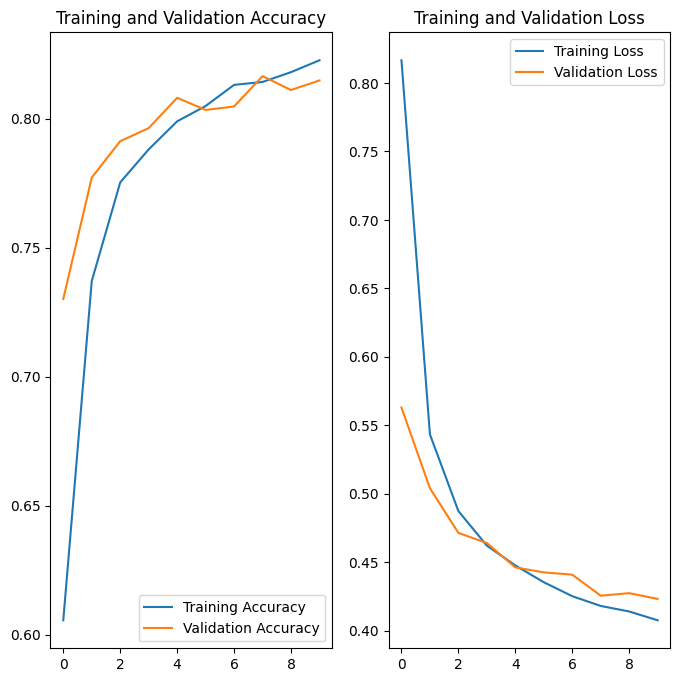

In [ ]:
epochs=10
acc = loaded_history['accuracy']
val_acc = loaded_history['val_accuracy']

loss =loaded_history['loss']
val_loss = loaded_history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('test.png')
plt.show()

7


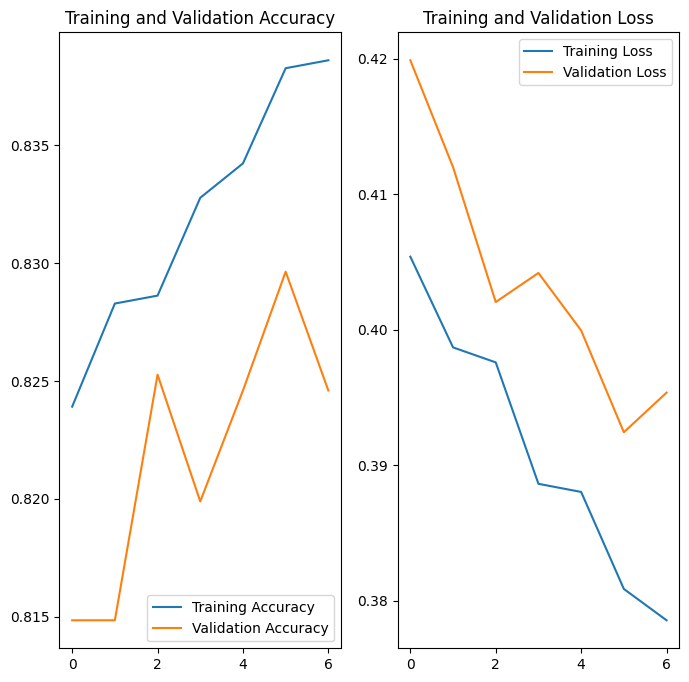

In [ ]:
epochs = len(loaded_history_fine['accuracy'])
print(epochs)
acc = loaded_history_fine['accuracy']
val_acc = loaded_history_fine['val_accuracy']

loss =loaded_history_fine['loss']
val_loss = loaded_history_fine['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('test.png')
plt.show()